# Predictions with uncertainty

Instead of just being plain wrong, how about when the model only has moderate-confidence, it outputs the top 2 options.

### First, load the train/test data 



In [2]:
# load the data
import pandas as pd
import numpy as np
processed_data = pd.read_csv('data/training_testing_maxgap_50_newdata_processed_m_vals.csv')
data = np.array(processed_data.iloc[:, 3:])
data = np.transpose(data)
data.shape
diagnoses = pd.read_csv('data/training_testing_diagnoses_maxgap_50_newdata.csv', sep = ',')
diagnoses = diagnoses.iloc[2:, ]
pooled_labels = np.array([4 if d == 5 else d for d in diagnoses['overallpath']])

# load the models
import pickle
import joblib

models = []
for i in range(4):
    model = joblib.load('figs_xgboost/xgboost_models/' + str(i) + '.pkl')
    models.append(model)

# and test indices
test_indices_list = pickle.load(open('figs_xgboost/test_indices_list.json', 'rb'))

/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1228, 158670)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
# and predict
for i in range(4):
    test_indices = test_indices_list[i]
    test_data = data[test_indices, :]
    print(test_data.shape)
    preds = models[i].predict(test_data)
    probs = models[i].predict_proba(test_data)
    y_true = pooled_labels[test_indices]

    print('Test accuracy:', np.mean(preds == y_true))
    probs
    sum(preds != y_true)

(319, 158670)
Test accuracy: 0.9592476489028213


array([[2.4673910e-04, 2.8940188e-04, 4.6612273e-04, 9.9879092e-01,
        2.0684909e-04],
       [1.0354711e-03, 6.2049512e-04, 1.4779799e-03, 9.9657011e-01,
        2.9594376e-04],
       [8.6490810e-04, 1.0657215e-03, 9.5919054e-04, 9.9669868e-01,
        4.1146867e-04],
       ...,
       [8.4865466e-03, 7.2488599e-03, 7.9579525e-02, 8.9696521e-01,
        7.7198413e-03],
       [9.9724436e-01, 4.1539542e-04, 5.3331058e-04, 1.3404507e-03,
        4.6651479e-04],
       [2.2311583e-02, 9.5365420e-03, 6.6558525e-02, 8.9137292e-01,
        1.0220459e-02]], dtype=float32)

13

(302, 158670)
Test accuracy: 0.9701986754966887


array([[1.23682246e-03, 9.56705306e-04, 1.11749703e-02, 9.86070096e-01,
        5.61380060e-04],
       [9.98954177e-01, 1.98276975e-04, 2.34143939e-04, 3.52149160e-04,
        2.61176057e-04],
       [6.83415914e-04, 3.33549979e-04, 1.64374418e-03, 9.97105420e-01,
        2.33920000e-04],
       ...,
       [4.83551063e-02, 2.94453442e-01, 1.17096985e-02, 9.40405298e-03,
        6.36077702e-01],
       [7.46570731e-05, 9.99216557e-01, 1.80075731e-04, 6.24994937e-05,
        4.66153520e-04],
       [5.16836917e-05, 9.99818623e-01, 5.34398241e-05, 4.50107145e-05,
        3.12531192e-05]], dtype=float32)

9

(310, 158670)
Test accuracy: 0.9516129032258065


array([[6.3301518e-04, 4.3353974e-04, 1.2232795e-03, 9.9657959e-01,
        1.1305317e-03],
       [2.8431523e-04, 1.9405337e-04, 9.3221420e-04, 9.9824417e-01,
        3.4531194e-04],
       [9.9108077e-04, 7.3516485e-04, 2.1392386e-03, 9.9367356e-01,
        2.4609268e-03],
       ...,
       [1.5714670e-03, 5.2599721e-03, 8.8203786e-04, 1.5847039e-03,
        9.9070179e-01],
       [9.9511164e-01, 8.5226505e-04, 9.7460177e-04, 2.0040248e-03,
        1.0574441e-03],
       [2.1529449e-03, 1.6631877e-02, 2.1673157e-03, 4.8224111e-03,
        9.7422540e-01]], dtype=float32)

15

(297, 158670)
Test accuracy: 0.9595959595959596


array([[9.76729035e-01, 3.03725293e-03, 8.04864429e-03, 1.07293725e-02,
        1.45571190e-03],
       [1.76925561e-04, 9.99133050e-01, 2.24122050e-04, 1.26675572e-04,
        3.39215039e-04],
       [2.40676032e-04, 5.56470768e-04, 1.80725439e-03, 9.97248709e-01,
        1.46900638e-04],
       ...,
       [7.66118610e-05, 9.99643683e-01, 7.64658034e-05, 9.28553709e-05,
        1.10350120e-04],
       [1.41006705e-04, 9.94021118e-01, 5.87768678e-04, 1.47361265e-04,
        5.10272104e-03],
       [9.98887241e-01, 1.38225674e-04, 1.78198286e-04, 4.00008546e-04,
        3.96391028e-04]], dtype=float32)

12

### Distribution of predicted class probabilities

[[2.4673910e-04 2.8940188e-04 4.6612273e-04 9.9879092e-01 2.0684909e-04]
 [1.0354711e-03 6.2049512e-04 1.4779799e-03 9.9657011e-01 2.9594376e-04]
 [8.6490810e-04 1.0657215e-03 9.5919054e-04 9.9669868e-01 4.1146867e-04]
 ...
 [8.4865466e-03 7.2488599e-03 7.9579525e-02 8.9696521e-01 7.7198413e-03]
 [9.9724436e-01 4.1539542e-04 5.3331058e-04 1.3404507e-03 4.6651479e-04]
 [2.2311583e-02 9.5365420e-03 6.6558525e-02 8.9137292e-01 1.0220459e-02]]
[[1.23682246e-03 9.56705306e-04 1.11749703e-02 9.86070096e-01
  5.61380060e-04]
 [9.98954177e-01 1.98276975e-04 2.34143939e-04 3.52149160e-04
  2.61176057e-04]
 [6.83415914e-04 3.33549979e-04 1.64374418e-03 9.97105420e-01
  2.33920000e-04]
 ...
 [4.83551063e-02 2.94453442e-01 1.17096985e-02 9.40405298e-03
  6.36077702e-01]
 [7.46570731e-05 9.99216557e-01 1.80075731e-04 6.24994937e-05
  4.66153520e-04]
 [5.16836917e-05 9.99818623e-01 5.34398241e-05 4.50107145e-05
  3.12531192e-05]]
[[6.3301518e-04 4.3353974e-04 1.2232795e-03 9.9657959e-01 1.1305317e-0

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Probability of predicted class')

Text(0, 0.5, 'Number of samples')

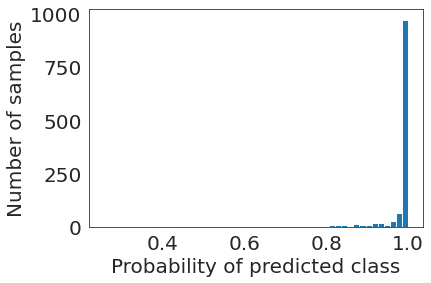

<Figure size 432x216 with 0 Axes>

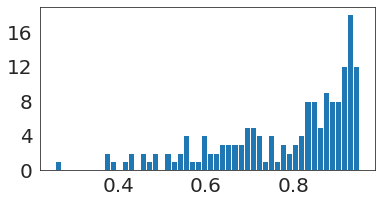

163

0.13273615635179153

0.25632226

In [6]:

import matplotlib.pyplot as plt

probs_of_predicted_class = []
for i in range(4):
    test_indices = test_indices_list[i]
    test_data = data[test_indices, :]
    preds = models[i].predict(test_data)
    probs = models[i].predict_proba(test_data)
    y_true = pooled_labels[test_indices]
    sample_names = np.array(diagnoses['colname'])[test_indices]

    # get the prob of the predicted class (ie, the max prob)
    print(probs)
    probs_of_predicted_class.extend(np.max(probs, axis = 1))

plt.rcParams.update({'font.size': 20})

# look at distribution
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize = (6, 4))
sb.set_style("white")
probs_of_predicted_class = np.array(probs_of_predicted_class)
h = plt.hist(probs_of_predicted_class, bins = 50)
plt.xlabel('Probability of predicted class')
plt.ylabel('Number of samples')
plt.savefig('figs_xgboost_high_mod_conf/probability_pred_class_model.svg', bbox_inches = 'tight')
plt.show()

plt.figure(figsize = (6, 3))
h = plt.hist(probs_of_predicted_class[probs_of_predicted_class <= 0.95], bins = 50)
xt = plt.yticks(list(range(0, 20, 4)), list(range(0, 20, 4)))
plt.savefig('figs_xgboost_high_mod_conf/probability_pred_class_model_zoomed.svg', bbox_inches = 'tight')
plt.show()

sum(probs_of_predicted_class <= 0.95)
sum(probs_of_predicted_class <= 0.95)/len(probs_of_predicted_class)
min(probs_of_predicted_class)

### Given output probabilities  and t (the confidence threshold), gets separate certain and uncertain predictions

In [17]:
def get_metrics(y_true, preds, probs):
    from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, roc_auc_score
    metrics = {
        'Accuracy': accuracy_score(y_true, preds),
        'MCC': matthews_corrcoef(y_true, preds),
        'F1': f1_score(y_true, preds, average = None, labels = [0,1,2,3,4]),
        'Precision': precision_score(y_true, preds, average = None, labels = [0,1,2,3,4]),
        'Recall': recall_score(y_true, preds, average = None, labels = [0,1,2,3,4])
    }
    return metrics

import pandas as pd
# get the perf of the certain and uncertain ones separately
def get_perf_with_uncertainty(preds, probs, y_true, sample_names, t, verbose = True):
    # get the prob of the predicted class (ie, the max prob)
    probs_of_predicted_class = np.max(probs, axis = 1)
    
    # get second highest prediction
    second_choice = np.argsort(probs)[:, 3] # 3rd column index as we want the second highest (goes from 0-4)
    if verbose:
        print('Should be 0:', np.mean(second_choice == preds)) # should be 0

    preds_with_uncertainty = pd.DataFrame({'sample': sample_names, 'preds' : preds, 'prob_of_first_pred': probs_of_predicted_class, 'uncertain': probs_of_predicted_class < t, 'second_choice': second_choice})
    preds_with_uncertainty['y_true'] = y_true
    preds_with_uncertainty['correct'] = preds_with_uncertainty['y_true'] == preds_with_uncertainty['preds']
    preds_with_uncertainty['second_correct'] = preds_with_uncertainty['y_true'] == preds_with_uncertainty['second_choice']
    preds_with_uncertainty['both_incorrect'] = (preds_with_uncertainty['second_correct'] == False) & (preds_with_uncertainty['correct'] == False)
    
    
    # conf mat and metrics for certain predictions:
    from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, roc_auc_score
    certain_preds = preds_with_uncertainty[preds_with_uncertainty['uncertain'] == False]
    certain_conf_mat = confusion_matrix(certain_preds['y_true'], certain_preds['preds'], labels = [0,1,2,3,4])
    
    certain_probs = probs[preds_with_uncertainty['uncertain'] == False]  
    certain_metrics = get_metrics(certain_preds['y_true'], certain_preds['preds'], certain_probs)
    
    
    # metrics for uncertain ones
    uncertain_preds = preds_with_uncertainty[preds_with_uncertainty['uncertain'] == True]
    certain_preds = preds_with_uncertainty[preds_with_uncertainty['uncertain'] == False]
    
    if verbose:
        # metrics for first prediction:
        print('Using first pred, accuracy is ', accuracy_score(uncertain_preds['y_true'], uncertain_preds['preds']))
        # metrics for first or second prediction:
        print('First or second pred, accuracy is ', np.mean((uncertain_preds['y_true'] == uncertain_preds['preds']) |(uncertain_preds['y_true'] == uncertain_preds['second_choice'])))
    
    uncertain_probs = probs[preds_with_uncertainty['uncertain'] == True]
    uncertain_metrics_first = get_metrics(uncertain_preds['y_true'], uncertain_preds['preds'], uncertain_probs)
    uncertain_metrics_second = get_metrics(uncertain_preds['y_true'], uncertain_preds['second_choice'], uncertain_probs)
    
    # for either first or second, taking the prediction that is correct, else taking first prediction
    first_or_second_preds = uncertain_preds.apply(lambda r: r['second_choice'] if r['second_correct'] == True else r['preds'], axis = 1)
    uncertain_metrics_first_or_second = get_metrics(uncertain_preds['y_true'], first_or_second_preds, uncertain_probs)
    
    # table of nums:
    uncertain_pred_table = uncertain_preds.groupby('y_true')[['correct', 'second_correct', 'both_incorrect']].sum()
    
    return(certain_conf_mat, certain_metrics, certain_preds, uncertain_pred_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second)

t = 0.85 # for now, an arbitrary t
# certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(preds, probs, y_true, sample_names, t) 

# certain_conf_mat
# uncertain_table


### Get test results for all 4 models

In [18]:
# summing results for all 4 models
certain_conf_mats = []
certain_metricss = []
uncertain_tables = []
uncertain_predss = []
uncertain_metrics_firsts = []
uncertain_metrics_seconds = []
uncertain_metrics_first_or_seconds = []
for i in range(4):
    test_indices = test_indices_list[i]
    test_data = data[test_indices, :]
    preds = models[i].predict(test_data)
    probs = models[i].predict_proba(test_data)
    y_true = pooled_labels[test_indices]
    sample_names = np.array(diagnoses['colname'])[test_indices]
 
    certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(preds, probs, y_true, sample_names, t)

    certain_conf_mats.append(certain_conf_mat)
    certain_metricss.append(certain_metrics)
    uncertain_tables.append(uncertain_table)
    uncertain_predss.append(uncertain_preds)
    uncertain_metrics_firsts.append(uncertain_metrics_first)
    uncertain_metrics_seconds.append(uncertain_metrics_second)
    uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)


Should be 0: 0.0
Using first pred, accuracy is  0.8148148148148148
First or second pred, accuracy is  0.9629629629629629


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5789473684210527
First or second pred, accuracy is  0.7894736842105263


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7142857142857143
First or second pred, accuracy is  0.8571428571428571


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5625
First or second pred, accuracy is  0.875


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:

def make_uncertain_tables_sum(uncertain_tables):
    uncertain_tables_sum = pd.DataFrame({'correct': 0, 'second_correct': 0, 'both_incorrect': 0}, index = [0, 1, 2, 3, 4])

    for table in uncertain_tables:
        for i in range(5):
            if i in table.index:
                row = table.loc[i, :]
                uncertain_tables_sum.loc[i, :] = uncertain_tables_sum.loc[i, :] + row
    return(uncertain_tables_sum)

uncertain_tables_sum = make_uncertain_tables_sum(uncertain_tables)
uncertain_tables_sum

,correct,second_correct,both_incorrect
0,2,0,0
1,19,8,3
2,18,1,3
3,8,3,0
4,15,5,5


### Plot results in conf mats

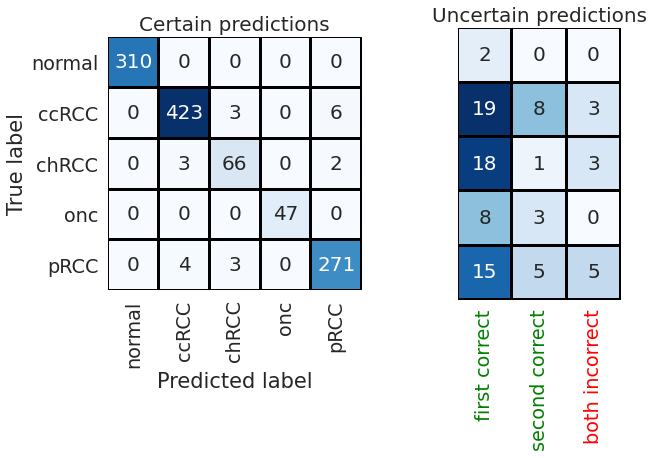

In [20]:
# and we want to show this in a nice heatmap format
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = sum(certain_conf_mats)

def plot_perf_with_uncertainty(conf_mat, uncertain_tables_sum, uncertain_predss, name = ''):
    cm_labels = ['normal', 'ccRCC', 'chRCC', 'onc', 'pRCC']
    font_size = 36
    title = 'Certain predictions'
    title2 = 'Uncertain predictions'
    title3 = 'Uncertain confusion matrix'
    
    # want 3 subplots
    fig, axs = plt.subplots(1, 2, figsize = (10, 5))

    # first, the certain conf mat
    sns.set(font_scale=1.75)
    # plt.clf()
    plt.rcParams.update({'font.size': font_size})
    t1 = axs[0].set_title(title, fontsize=20)
    plot = sns.heatmap(conf_mat, annot=True, fmt='d', square = True, cbar = False, cmap='Blues', linewidths=2, linecolor="black", annot_kws = {"size": 20}, xticklabels = cm_labels, yticklabels = cm_labels, ax = axs[0])
    ls = plot.set(xlabel='Predicted label', ylabel='True label')

    # now the uncertain table
    xticks = ['first correct', 'second correct', 'both incorrect']
    h = sns.heatmap(uncertain_tables_sum, annot = True, fmt='d', square = True, cbar = False, cmap = 'Blues', linewidths = 2, linecolor = 'black', annot_kws = {'size': 20}, xticklabels = xticks, yticklabels = [], ax = axs[1])
    t2 = axs[1].set_title(title2, fontsize=20)

    # colour to depict right and wrong
    axs[1].xaxis.get_ticklabels()[0].set_color('green')
    axs[1].xaxis.get_ticklabels()[1].set_color('green')
    axs[1].xaxis.get_ticklabels()[2].set_color('red')

    if name != '':
        plt.savefig('figs_xgboost_high_mod_conf/' + name, bbox_inches='tight')
    plt.show()

t = 0.85
plot_perf_with_uncertainty(conf_mat, uncertain_tables_sum, uncertain_predss)


### Finding the best threshold for train/test data

In [21]:
# so now lets try out some threshold values
# given a t, returns testset results from all 4 models

def get_train_test_perf_with_uncertainty(t):
    certain_conf_mats = []
    certain_metricss = []
    uncertain_tables = []
    uncertain_predss = []
    certain_predss = []
    uncertain_metrics_firsts = []
    uncertain_metrics_seconds = []
    uncertain_metrics_first_or_seconds = []
    for i in range(4):
        test_indices = test_indices_list[i]
        test_data = data[test_indices, :]
        preds = models[i].predict(test_data)
        probs = models[i].predict_proba(test_data)
        y_true = pooled_labels[test_indices]
        sample_names = np.array(diagnoses['colname'])[test_indices]

        certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(preds, probs, y_true, sample_names, t)

        certain_conf_mats.append(certain_conf_mat)
        certain_metricss.append(certain_metrics)
        uncertain_tables.append(uncertain_table)
        uncertain_predss.append(uncertain_preds)
        certain_predss.append(certain_preds)
        uncertain_metrics_firsts.append(uncertain_metrics_first)
        uncertain_metrics_seconds.append(uncertain_metrics_second)
        uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)
        

    return(certain_conf_mats, certain_metricss, certain_predss, uncertain_tables, uncertain_predss, uncertain_metrics_firsts, uncertain_metrics_seconds, uncertain_metrics_first_or_seconds)

# t = 0.9
# certain_conf_mats, certain_metricss, uncertain_tables, uncertain_predss, uncertain_metrics_firsts, uncertain_metrics_seconds, uncertain_metrics_first_or_seconds = get_train_test_perf_with_uncertainty(t)
# conf_mat = sum(certain_conf_mats)
# uncertain_tables_sum = make_uncertain_tables_sum(uncertain_tables)
# plot_perf_with_uncertainty(conf_mat, uncertain_tables_sum, uncertain_predss)



In [22]:
# how does the accuracy of the certain predictions change with the threshold?
# and how does the accuracy of the uncertain first or second pred change with the threshold?
accs = {}
uncertain_both_correct_accs = {}
uncertain_first_correct_accs = {}
fraction_certains = {}
for t in np.linspace(0.5, 0.975, 20):
    t
    certain_conf_mats, certain_metricss, certain_predss, uncertain_tables, uncertain_predss, uncertain_metrics_firsts, uncertain_metrics_seconds, uncertain_metrics_first_or_seconds = get_train_test_perf_with_uncertainty(t)
    conf_mat = sum(certain_conf_mats)
    
    sum_correct = sum([conf_mat[i, j] for i in range(5) for j in range(5) if i == j])
    sum_incorrect = sum([conf_mat[i, j] for i in range(5) for j in range(5) if i != j])
    acc_micro = sum_correct/(sum_incorrect + sum_correct)
    accs[t] = acc_micro
    
    both_corrects = [np.logical_not(uncertain_predss[i]['both_incorrect']) for i in range(len(uncertain_predss))]
    uncertain_both_correct_accs[t] = pd.concat(both_corrects).mean()
    
    first_corrects = [uncertain_predss[i]['correct'] for i in range(len(uncertain_predss))]
    uncertain_first_correct_accs[t] = pd.concat(first_corrects).mean()
    
    num_uncertains = sum([uncertain_predss[i]['uncertain'].sum() for i in range(len(uncertain_predss))])
    num_certains = sum(sum(conf_mat))
    fract = num_certains/(num_certains + num_uncertains)
    fraction_certains[t] = fract
    

0.5

Should be 0: 0.0
Using first pred, accuracy is  0.6
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  1.0
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.5


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

0.525

Should be 0: 0.0
Using first pred, accuracy is  0.6
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.5


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.5


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

0.55

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.6666666666666666


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.42857142857142855
First or second pred, accuracy is  0.5714285714285714


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

0.575

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.8888888888888888


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.6666666666666666


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.42857142857142855
First or second pred, accuracy is  0.5714285714285714


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

0.6

Should be 0: 0.0
Using first pred, accuracy is  0.7
First or second pred, accuracy is  0.9


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.75


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.42857142857142855
First or second pred, accuracy is  0.5714285714285714


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.75
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

0.625

Should be 0: 0.0
Using first pred, accuracy is  0.75
First or second pred, accuracy is  0.9166666666666666


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6
First or second pred, accuracy is  0.8


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.375
First or second pred, accuracy is  0.5


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.8333333333333334
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.65

Should be 0: 0.0
Using first pred, accuracy is  0.6923076923076923
First or second pred, accuracy is  0.9230769230769231


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5714285714285714
First or second pred, accuracy is  0.8571428571428571


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.4444444444444444
First or second pred, accuracy is  0.5555555555555556


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.8333333333333334
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.675

Should be 0: 0.0
Using first pred, accuracy is  0.7333333333333333
First or second pred, accuracy is  0.9333333333333333


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.75


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.6


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.75
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7

Should be 0: 0.0
Using first pred, accuracy is  0.7222222222222222
First or second pred, accuracy is  0.9444444444444444


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5555555555555556
First or second pred, accuracy is  0.7777777777777778


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6153846153846154
First or second pred, accuracy is  0.6923076923076923


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.75
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.725

Should be 0: 0.0
Using first pred, accuracy is  0.7619047619047619
First or second pred, accuracy is  0.9523809523809523


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6
First or second pred, accuracy is  0.8


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6875
First or second pred, accuracy is  0.75


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7777777777777778
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.75

Should be 0: 0.0
Using first pred, accuracy is  0.7727272727272727
First or second pred, accuracy is  0.9545454545454546


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6363636363636364
First or second pred, accuracy is  0.8181818181818182


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.7777777777777778


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7749999999999999

Should be 0: 0.0
Using first pred, accuracy is  0.7727272727272727
First or second pred, accuracy is  0.9545454545454546


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5833333333333334
First or second pred, accuracy is  0.8333333333333334


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.8095238095238095


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8

Should be 0: 0.0
Using first pred, accuracy is  0.782608695652174
First or second pred, accuracy is  0.9565217391304348


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5384615384615384
First or second pred, accuracy is  0.7692307692307693


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.8095238095238095


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6363636363636364
First or second pred, accuracy is  0.9090909090909091


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.825

Should be 0: 0.0
Using first pred, accuracy is  0.8
First or second pred, accuracy is  0.96


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5333333333333333
First or second pred, accuracy is  0.8


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6956521739130435
First or second pred, accuracy is  0.8260869565217391


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.9166666666666666


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.85

Should be 0: 0.0
Using first pred, accuracy is  0.8148148148148148
First or second pred, accuracy is  0.9629629629629629


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5789473684210527
First or second pred, accuracy is  0.7894736842105263


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7142857142857143
First or second pred, accuracy is  0.8571428571428571


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5625
First or second pred, accuracy is  0.875


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.875

Should be 0: 0.0
Using first pred, accuracy is  0.8333333333333334
First or second pred, accuracy is  0.9666666666666667
Should be 0: 0.0
Using first pred, accuracy is  0.6190476190476191
First or second pred, accuracy is  0.8095238095238095


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7333333333333333
First or second pred, accuracy is  0.8666666666666667


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.6666666666666666
First or second pred, accuracy is  0.9047619047619048


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8999999999999999

Should be 0: 0.0
Using first pred, accuracy is  0.8611111111111112
First or second pred, accuracy is  0.9722222222222222
Should be 0: 0.0
Using first pred, accuracy is  0.68
First or second pred, accuracy is  0.84


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7419354838709677
First or second pred, accuracy is  0.8709677419354839


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.68
First or second pred, accuracy is  0.88


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.925

Should be 0: 0.0
Using first pred, accuracy is  0.85
First or second pred, accuracy is  0.975
Should be 0: 0.0
Using first pred, accuracy is  0.6896551724137931
First or second pred, accuracy is  0.8620689655172413


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7692307692307693
First or second pred, accuracy is  0.8974358974358975


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Should be 0: 0.0
Using first pred, accuracy is  0.7419354838709677
First or second pred, accuracy is  0.9032258064516129


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.95

Should be 0: 0.0
Using first pred, accuracy is  0.8372093023255814
First or second pred, accuracy is  0.9767441860465116
Should be 0: 0.0
Using first pred, accuracy is  0.7352941176470589
First or second pred, accuracy is  0.8823529411764706


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7959183673469388
First or second pred, accuracy is  0.9183673469387755
Should be 0: 0.0
Using first pred, accuracy is  0.7837837837837838
First or second pred, accuracy is  0.918918918918919


0.975

Should be 0: 0.0
Using first pred, accuracy is  0.8461538461538461
First or second pred, accuracy is  0.9615384615384616
Should be 0: 0.0
Using first pred, accuracy is  0.82
First or second pred, accuracy is  0.92
Should be 0: 0.0
Using first pred, accuracy is  0.8
First or second pred, accuracy is  0.9
Should be 0: 0.0
Using first pred, accuracy is  0.8085106382978723
First or second pred, accuracy is  0.9361702127659575


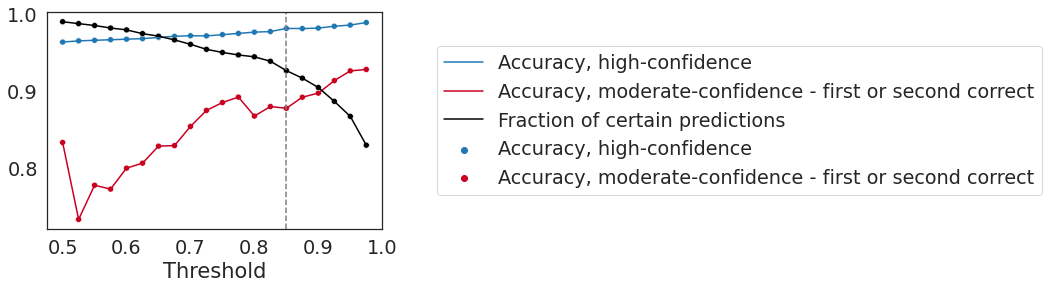

In [23]:
# plot the scores for each threshold value
# to_plot = pd.DataFrame({'Accuracy, certain': accs.values(), 'Accuracy, uncertain - first or second correct': uncertain_both_correct_accs.values(), 'Accuracy, uncertain - first correct': uncertain_first_correct_accs.values(), 'Fraction of certain predictions':fraction_certains.values(), 't': accs.keys()})
to_plot = pd.DataFrame({'Accuracy, high-confidence': accs.values(), 'Accuracy, moderate-confidence - first or second correct': uncertain_both_correct_accs.values(), 'Fraction of certain predictions':fraction_certains.values(), 't': accs.keys()})
to_plot = pd.melt(to_plot, id_vars = ['t']) # put in long form
# lets plot these
sns.set_style('white')
ax = sns.scatterplot(data = to_plot, x = 't', y = 'value', hue = 'variable', palette=['#1f78b4', '#ca0020', '#000000'])
ax = sns.lineplot(data = to_plot, x = 't', y = 'value', hue = 'variable', palette=['#1f78b4', '#ca0020', '#000000'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles = handles[0:5], labels = labels[0:5], loc='right', bbox_to_anchor = (3, 0.5)) # move legend out the way
xl = plt.xlabel('Threshold')
yl = plt.ylabel('')
xts = plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.axvline(x=0.85, ymin=0, ymax=1, color='grey', ls='--')
plt.savefig('figs_xgboost_high_mod_conf/thresholds_test_data.svg', bbox_inches='tight')


### Automated method to find t

In [25]:
# using an automated method to find the right t

# first average certain acc + fraction of certains
score_df = pd.DataFrame({'Accuracy, certain': accs.values(), 'Accuracy, uncertain - first or second correct': uncertain_both_correct_accs.values(), 'Accuracy, uncertain - first correct': uncertain_first_correct_accs.values(), 'Fraction of certain predictions':fraction_certains.values(), 't': accs.keys()})
mean_acc_and_frac = (score_df['Accuracy, certain'] + score_df['Fraction of certain predictions'])/2

# np.argsort(mean_acc_and_frac) # monotonically decreasing
# then get a range where is maxed


# fit curve with scipy
from scipy.optimize import curve_fit
x = score_df['t']
# y = score_df['Accuracy, uncertain - first or second correct']
y = score_df['Accuracy, uncertain - first correct']
x_t = score_df['t'][1:]
# y_t = score_df['Accuracy, uncertain - first or second correct'][1:]
y_t = score_df['Accuracy, uncertain - first correct'][1:]


def f_lin(x, a, b): # want to assume least so will fit linear model
        return(a*x + b)
    
def fit_line(x, y): 
    ests, covar_ests = curve_fit(f_lin, x, y)  
    return(ests)


#### Fitting straight lines to uncertain accuracy points:

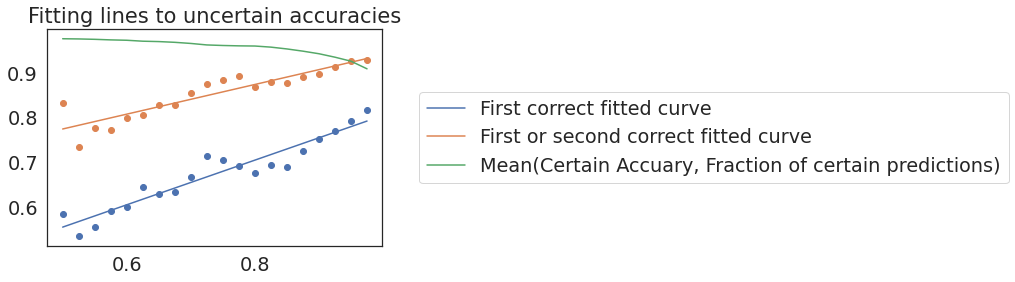

In [26]:
# with all data:
x = score_df['t']
y = score_df['Accuracy, uncertain - first correct']
ests_first = fit_line(x, y)
plt.scatter(x, y)
l = plt.plot(x, f_lin(x, *ests_first), label = 'First correct fitted curve') # the estimated curve

y = score_df['Accuracy, uncertain - first or second correct'] # and for first and second
ests_first = fit_line(x, y)
l = plt.scatter(x, y)
l = plt.plot(x, f_lin(x, *ests_first), label = 'First or second correct fitted curve')

l = plt.plot(x, mean_acc_and_frac, label = 'Mean(Certain Accuary, Fraction of certain predictions)')
l = plt.legend(loc='right', bbox_to_anchor = (2.9, 0.5))

t = plt.title('Fitting lines to uncertain accuracies')
plt.show()



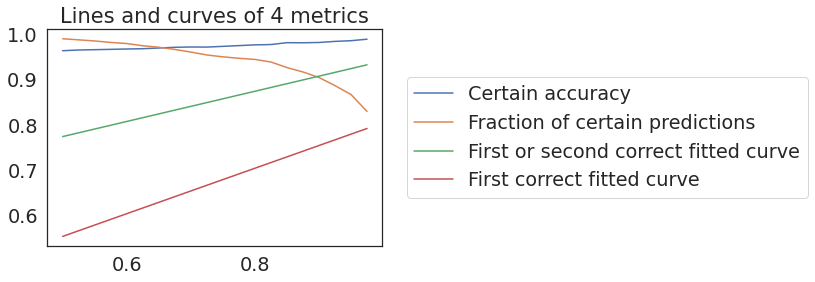

In [27]:
# plot all 4 lines on one plot:

l = plt.plot(score_df['t'], score_df['Accuracy, certain'], label = 'Certain accuracy')
l = plt.plot(score_df['t'], score_df['Fraction of certain predictions'], label = 'Fraction of certain predictions')
x = score_df['t']

y = score_df['Accuracy, uncertain - first or second correct'] # and for first and second
ests_first_or_second = fit_line(x, y)
l = plt.plot(x, f_lin(x, *ests_first_or_second), label = 'First or second correct fitted curve')

y = score_df['Accuracy, uncertain - first correct']
ests_first = fit_line(x, y)
l = plt.plot(x, f_lin(x, *ests_first), label = 'First correct fitted curve') # the estimated curve

l = plt.legend(loc='right', bbox_to_anchor = (2.3, 0.5))

t = plt.title('Lines and curves of 4 metrics')

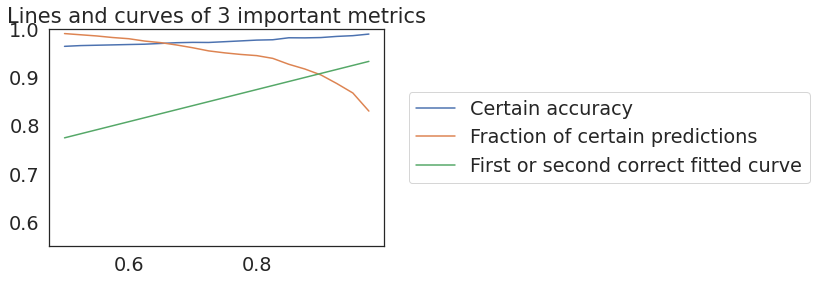

In [28]:
# plot all 3 important lines on one plot:

l = plt.plot(score_df['t'], score_df['Accuracy, certain'], label = 'Certain accuracy')
l = plt.plot(score_df['t'], score_df['Fraction of certain predictions'], label = 'Fraction of certain predictions')
x = score_df['t']


y = score_df['Accuracy, uncertain - first or second correct'] # and for first and second
ests_first_or_second = fit_line(x, y)
l = plt.plot(x, f_lin(x, *ests_first_or_second), label = 'First or second correct fitted curve')

l = plt.legend(loc='right', bbox_to_anchor = (2.3, 0.5))
yl = plt.ylim([0.55, 1])
t = plt.title('Lines and curves of 3 important metrics')

#### Excluding first correct line, as we don't really care about it

t would be:  0.85


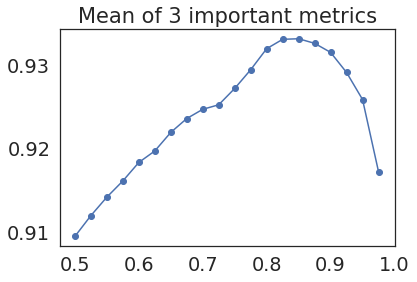

In [30]:
# normal average, excluding accuracy of first correct
sb.set_style('white')

av_of_4 = (score_df['Fraction of certain predictions'] + score_df['Accuracy, certain'] + f_lin(x, *ests_first_or_second))/3

l = plt.plot(x, av_of_4)
l = plt.scatter(x, av_of_4)
xts = plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])

t = plt.title('Mean of 3 important metrics')
print('t would be: ', x[np.argmax(av_of_4)])

# this method makes most sense!! Implement this one!

In [31]:
t = 0.85
to_plot[to_plot['t'] == t] # so this threshold leads to 0.92 of predictions are certain

,t,variable,value
14,0.85,"Accuracy, high-confidence",0.981547
34,0.85,"Accuracy, moderate-confidence - first or secon...",0.877778
54,0.85,Fraction of certain predictions,0.926710


From this plot, 0.85 looks like a reasonable choice. This prioritises a high fraction of certain predictions, which means there will not be a large number of uncertain predictions to go through.

### Test set results with this choice of t

Should be 0: 0.0
Using first pred, accuracy is  0.8148148148148148
First or second pred, accuracy is  0.9629629629629629


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5789473684210527
First or second pred, accuracy is  0.7894736842105263


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.7142857142857143
First or second pred, accuracy is  0.8571428571428571


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1496: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

Should be 0: 0.0
Using first pred, accuracy is  0.5625
First or second pred, accuracy is  0.875


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


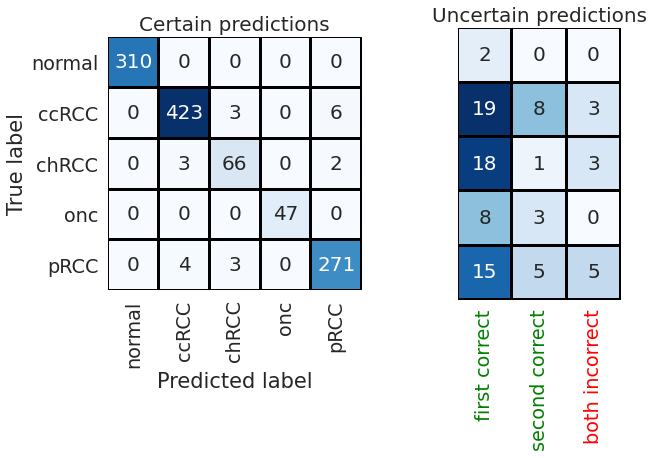

[{'Accuracy': 0.9726027397260274,
  'MCC': 0.9615216080393486,
  'F1': array([1.        , 0.96460177, 0.94444444, 1.        , 0.95384615]),
  'Precision': array([1.        , 0.95614035, 1.        , 1.        , 0.95384615]),
  'Recall': array([1.        , 0.97321429, 0.89473684, 1.        , 0.95384615])},
 {'Accuracy': 0.9964664310954063,
  'MCC': 0.995073455913694,
  'F1': array([1.        , 0.99530516, 0.96551724, 1.        , 1.        ]),
  'Precision': array([1.        , 1.        , 0.93333333, 1.        , 1.        ]),
  'Recall': array([1.        , 0.99065421, 1.        , 1.        , 1.        ])},
 {'Accuracy': 0.975177304964539,
  'MCC': 0.9653263982334345,
  'F1': array([1.        , 0.98165138, 0.85714286, 1.        , 0.96240602]),
  'Precision': array([1.        , 0.99074074, 0.83333333, 1.        , 0.95522388]),
  'Recall': array([1.        , 0.97272727, 0.88235294, 1.        , 0.96969697])},
 {'Accuracy': 0.9822064056939501,
  'MCC': 0.9754473682147502,
  'F1': array([1.    

[{'Accuracy': 0.8148148148148148,
  'MCC': 0.7630405421740688,
  'F1': array([0.        , 0.66666667, 0.8       , 0.90909091, 0.84210526]),
  'Precision': array([0.        , 1.        , 0.66666667, 1.        , 0.8       ]),
  'Recall': array([0.        , 0.5       , 1.        , 0.83333333, 0.88888889])},
 {'Accuracy': 0.5789473684210527,
  'MCC': 0.32891812735531006,
  'F1': array([0.        , 0.61538462, 0.66666667, 0.        , 0.28571429]),
  'Precision': array([0.        , 0.57142857, 0.66666667, 0.        , 0.33333333]),
  'Recall': array([0.        , 0.66666667, 0.66666667, 0.        , 0.25      ])},
 {'Accuracy': 0.7142857142857143,
  'MCC': 0.5598665228472728,
  'F1': array([0.        , 0.78571429, 0.76923077, 0.        , 0.57142857]),
  'Precision': array([0.        , 0.78571429, 0.625     , 0.        , 0.66666667]),
  'Recall': array([0.        , 0.78571429, 1.        , 0.        , 0.5       ])},
 {'Accuracy': 0.5625,
  'MCC': 0.45,
  'F1': array([1.        , 0.28571429, 0.4  

[{'Accuracy': 0.14814814814814814,
  'MCC': -0.10654670927748842,
  'F1': array([0.        , 0.42857143, 0.        , 0.18181818, 0.        ]),
  'Precision': array([0.   , 0.375, 0.   , 0.2  , 0.   ]),
  'Recall': array([0.        , 0.5       , 0.        , 0.16666667, 0.        ])},
 {'Accuracy': 0.21052631578947367,
  'MCC': 0.0,
  'F1': array([0.        , 0.36363636, 0.18181818, 0.        , 0.18181818]),
  'Precision': array([0.        , 0.4       , 0.5       , 0.        , 0.14285714]),
  'Recall': array([0.        , 0.33333333, 0.11111111, 0.        , 0.25      ])},
 {'Accuracy': 0.14285714285714285,
  'MCC': -0.17001093778071943,
  'F1': array([0.        , 0.        , 0.        , 0.28571429, 0.28571429]),
  'Precision': array([0.        , 0.        , 0.        , 0.16666667, 0.23076923]),
  'Recall': array([0.   , 0.   , 0.   , 1.   , 0.375])},
 {'Accuracy': 0.3125,
  'MCC': 0.13627702877384937,
  'F1': array([0.        , 0.6       , 0.        , 0.33333333, 0.28571429]),
  'Precisio

[{'Accuracy': 0.9629629629629629,
  'MCC': 0.9520360019556026,
  'F1': array([0.        , 1.        , 0.92307692, 1.        , 0.94117647]),
  'Precision': array([0.        , 1.        , 0.85714286, 1.        , 1.        ]),
  'Recall': array([0.        , 1.        , 1.        , 1.        , 0.88888889])},
 {'Accuracy': 0.7894736842105263,
  'MCC': 0.6667259338283312,
  'F1': array([0.        , 0.92307692, 0.77777778, 0.        , 0.57142857]),
  'Precision': array([0.        , 0.85714286, 0.77777778, 0.        , 0.66666667]),
  'Recall': array([0.        , 1.        , 0.77777778, 0.        , 0.5       ])},
 {'Accuracy': 0.8571428571428571,
  'MCC': 0.8008750272229913,
  'F1': array([0.        , 0.88      , 0.76923077, 1.        , 0.875     ]),
  'Precision': array([0.   , 1.   , 0.625, 1.   , 0.875]),
  'Recall': array([0.        , 0.78571429, 1.        , 1.        , 0.875     ])},
 {'Accuracy': 0.875,
  'MCC': 0.8442317648177381,
  'F1': array([1.        , 0.88888889, 0.5       , 1.    

In [42]:
# Test set confusion plots with this threshold:
t = 0.85
# t = 0.8
certain_conf_mats, certain_metricss, certain_predss, uncertain_tables, uncertain_predss, uncertain_metrics_firsts, uncertain_metrics_seconds, uncertain_metrics_first_or_seconds = get_train_test_perf_with_uncertainty(t)
conf_mat = sum(certain_conf_mats)

uncertain_tables_sum = make_uncertain_tables_sum(uncertain_tables)

plot_perf_with_uncertainty(conf_mat, uncertain_tables_sum, uncertain_predss, 'test_set_uncertain_conf_mats.svg')


# metrics we need:
# acc, MCC, F1, precision, recall, ROC AUC
# for:
# certain
certain_metricss
# uncertain - first predicted metrics
uncertain_metrics_firsts
# uncertain - second predicted metrics
uncertain_metrics_seconds
# uncertain - first or second predicted metrics (so take whichever one is correct, else take first)
uncertain_metrics_first_or_seconds
# then average these across all 4 models (macro average), and compare with previous scores




In [43]:
# now to save the prediction tables
preds_tables = [certain_predss[i].append(uncertain_predss[i]) for i in range(4)]
for i in range(len(preds_tables)):
    preds_tables[i]['source'] = ''
    preds_tables[i]['source'][preds_tables[i]['sample'].str.contains('TCGA')] = 'TCGA'
    preds_tables[i]['source'][preds_tables[i]['sample'].str.contains('_R0')] = 'Chopra'
    preds_tables[i]['source'][preds_tables[i]['source'] == ''] = 'EPIC'
    

to_save = pd.concat(preds_tables)
# now split by source
to_save[to_save['source'] == 'EPIC'].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/test_preds_EPIC.csv', index = False)
to_save[to_save['source'] == 'Chopra'].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/test_preds_Chopra.csv', index = False)
to_save[to_save['source'] == 'TCGA'].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/test_preds_TCGA.csv', index = False)




/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
# are more uncertain predictions from a specific dataset?
to_save[to_save['uncertain'] == True][['source']].value_counts()
to_save[to_save['uncertain'] == True][['second_correct', 'source']].value_counts()
# there is no dataset specific bias

source
EPIC      49
TCGA      41
dtype: int64

second_correct  source
False           EPIC      42
                TCGA      31
True            TCGA      10
                EPIC       7
dtype: int64

In [44]:

score_df = pd.DataFrame(
    {'Certain': [np.mean([m['Accuracy'] for m in certain_metricss]), np.mean([m['MCC'] for m in certain_metricss]), np.round(np.mean([m['F1'] for m in certain_metricss], axis = 0), 3)],
     'Uncertain first prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_firsts]), np.mean([m['MCC'] for m in uncertain_metrics_firsts]), np.round(np.mean([m['F1'] for m in uncertain_metrics_firsts], axis = 0), 3)],
     'Uncertain second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_seconds], axis = 0), 3)],
     'Uncertain first or second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_first_or_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_first_or_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_first_or_seconds], axis = 0), 3)]
}, index=['Accuracy', 'MCC', 'F1'])


score_df.transpose()

,Accuracy,MCC,F1
Certain,0.981613,0.974342,"[1.0, 0.982, 0.924, 1.0, 0.973]"
Uncertain first prediction,0.667637,0.525456,"[0.25, 0.588, 0.659, 0.442, 0.536]"
Uncertain second prediction,0.203508,-0.0350702,"[0.0, 0.348, 0.045, 0.2, 0.188]"
Uncertain first or second prediction,0.871145,0.815967,"[0.25, 0.923, 0.743, 0.75, 0.811]"


### Now, applying this chosen threshold to the external Stanford data (the Brennan dataset)

Does this leave the incorrect predictions primarily in the uncertain group, and the correct predictions in the certain group?

In [50]:
# read in and process the data:
import pandas as pd
data = pd.read_csv('data/Brennandata/preprocessed_validation_beta.csv', sep = ',')
seqnames = data['seqnames']
start = data['start']
colnames = data.columns[3:]

stanford_diagnoses = pd.read_csv('data/Brennandata/preprocessed_validation_diagnoses.csv')
mapping = {'Normal kidney parenchyma': 0, 'Clear cell RCC': 1, 'RCC-Chromophobe': 2, 'Oncocytoma': 3}
stanford_diagnoses['overallpath'] = [mapping[l] for l in stanford_diagnoses['Sample_Type']]

def deal_with_Inf(m_values_mat, extreme_val = 0):
    if extreme_val == 0:
        max_val = np.nanmax(m_values_mat[np.logical_not(np.isinf(m_values_mat))]) # looking at m values that arn't Inf
        min_val = np.nanmin(m_values_mat[np.logical_not(np.isinf(m_values_mat))])
    else:
        max_val = extreme_val
        min_val = -extreme_val
    print(max_val, min_val)
    indices = np.argwhere(np.isinf(m_values_mat)) # where m values is +/- Inf
    for i in range(len(indices)):
        if m_values_mat[indices[i][0], indices[i][1]] > 0:
            m_values_mat[indices[i][0], indices[i][1]] = max_val
        else:
            m_values_mat[indices[i][0], indices[i][1]] = min_val
    return m_values_mat

import numpy as np
data = np.array(data.iloc[:, 3:])
m_vals = np.log2((data)/(1-data)) # this will result in inf and -infs!
m_vals = deal_with_Inf(m_vals) # mirrors extreme vals of train/test set

# get into right shape
met_array = m_vals.transpose()
met_array.shape # rows are samples, columns are features
met_array

/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/home/in268/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log2


14.12209999416731 -14.447212401572582


(37, 158670)

array([[ -2.41045349,   4.12970443,  -3.6732651 , ...,  -4.68587172,
         -4.87860855,  -5.57814967],
       [ -0.57889357,   3.6606687 ,  -3.70838959, ...,  -4.64370648,
         -4.70910215,  -4.94596848],
       [ -0.67711457,   3.43285103,  -3.85659065, ...,  -5.23622619,
         -5.59005142,  -5.04139492],
       ...,
       [  0.19385097,   3.93920297,  -3.78034858, ...,  -5.93155689,
         -6.46434214, -14.4472124 ],
       [  1.27710364,   3.97852499,  -4.05114465, ...,  -5.64802225,
         -5.93944819,  -9.42785291],
       [  0.05262082,   3.80866355,  -3.94093249, ...,  -4.26466665,
         -5.37583795,  -5.34755213]])

In [142]:
def get_model(i):
    import joblib
    model = joblib.load('figs_xgboost/xgboost_models/' + str(i) + '.pkl')
    return(model)


/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[15,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 2,  0,  6,  0],
       [ 2,  1,  6,  3]])

0.7027027027027027

0.975

Should be 0: 0.0
Using first pred, accuracy is  0.47368421052631576
First or second pred, accuracy is  0.8421052631578947


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

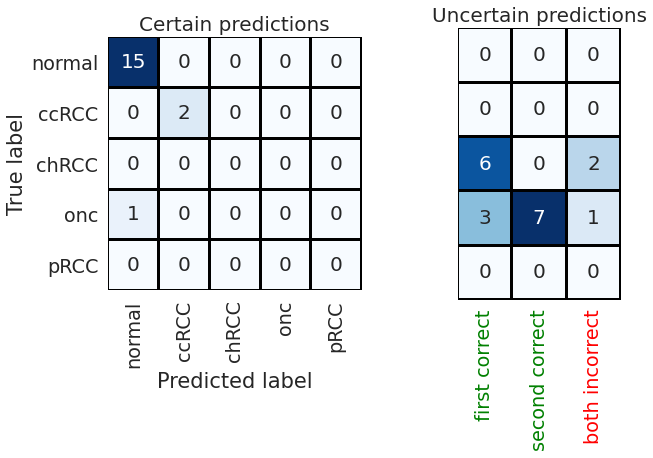

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[15,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 2,  0,  6,  0],
       [ 1,  1,  7,  3]])

0.7027027027027027

0.975

Should be 0: 0.0
Using first pred, accuracy is  0.4444444444444444
First or second pred, accuracy is  0.7777777777777778


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

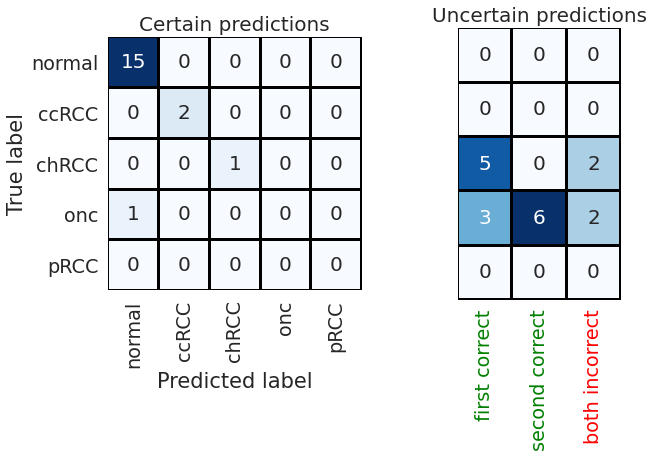

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[15,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 2,  0,  6,  0],
       [ 1,  0,  8,  3]])

0.7027027027027027

0.975

Should be 0: 0.0
Using first pred, accuracy is  0.47368421052631576
First or second pred, accuracy is  0.8421052631578947


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

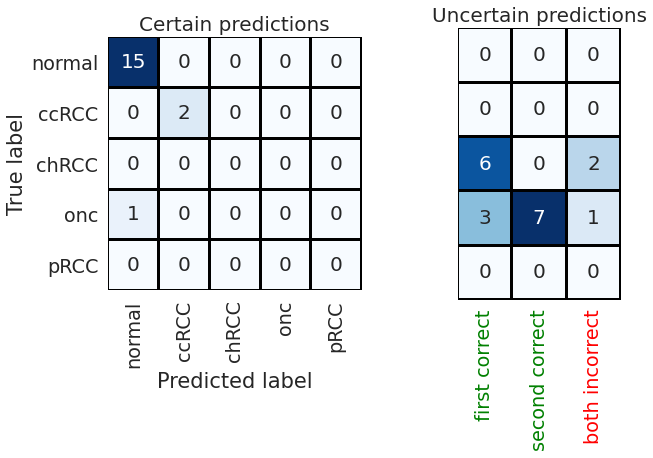

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[15,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 2,  0,  6,  0],
       [ 1,  0,  8,  3]])

0.7027027027027027

0.975

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.6666666666666666


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

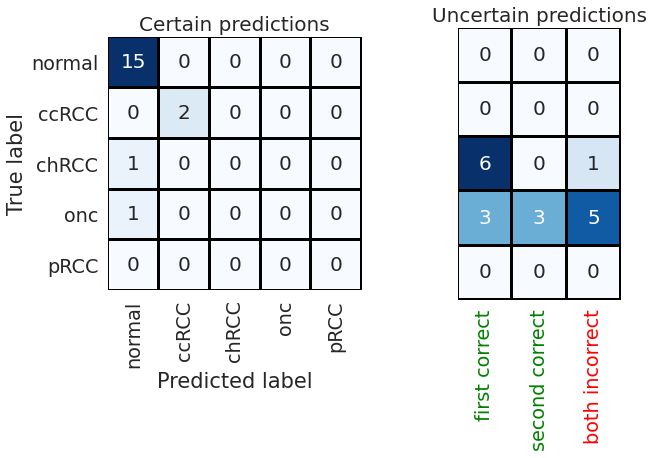

,Accuracy,MCC,F1
Certain,0.932749,0.782537,"[0.96, 1.0, 0.25, 0.0, 0.0]"
Uncertain first prediction,0.472953,0.195696,"[0.0, 0.0, 0.561, 0.429, 0.0]"
Uncertain second prediction,0.309211,0.113179,"[0.0, 0.0, 0.0, 0.673, 0.0]"
Uncertain first or second prediction,0.782164,0.631947,"[0.0, 0.0, 0.76, 0.878, 0.0]"


In [51]:

from sklearn.metrics import confusion_matrix

certain_metricss = []
uncertain_metrics_firsts = []
uncertain_metrics_seconds = []
uncertain_metrics_first_or_seconds = []
uncertain_predss = []
certain_predss = []
    
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (stanford_diagnoses['overallpath'] == predictions).mean()
    confusion_matrix(stanford_diagnoses['overallpath'], predictions)
    acc

    t
    certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(predictions, probs, stanford_diagnoses['overallpath'], stanford_diagnoses['X'], t)

    certain_metricss.append(certain_metrics)
    uncertain_metrics_firsts.append(uncertain_metrics_first)
    uncertain_metrics_seconds.append(uncertain_metrics_second)
    uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)
    
    uncertain_predss.append(uncertain_preds)
    certain_predss.append(certain_preds)
    
    # add missing rows in uncertain_table
    to_add = set([0,1,2,3,4]).difference(uncertain_table.index)
    for i in to_add:
        uncertain_table.loc[i, :] = [0, 0, 0]
    uncertain_table = uncertain_table.loc[[0,1,2,3,4]].astype('int')
    uncertain_table.index.name = ''
    plot_perf_with_uncertainty(certain_conf_mat, uncertain_table, [uncertain_preds], name = 'stanford_uncertain_conf_mats_' + str(model_num) + '.svg')

    
score_df_stanford = pd.DataFrame(
    {'Certain': [np.mean([m['Accuracy'] for m in certain_metricss]), np.mean([m['MCC'] for m in certain_metricss]), np.round(np.mean([m['F1'] for m in certain_metricss], axis = 0), 3)],
     'Uncertain first prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_firsts]), np.mean([m['MCC'] for m in uncertain_metrics_firsts]), np.round(np.mean([m['F1'] for m in uncertain_metrics_firsts], axis = 0), 3)],
     'Uncertain second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_seconds], axis = 0), 3)],
     'Uncertain first or second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_first_or_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_first_or_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_first_or_seconds], axis = 0), 3)]
}, index=['Accuracy', 'MCC', 'F1'])
score_df_stanford.transpose()

In [52]:

# now to save the prediction tables
preds_tables = [certain_predss[i].append(uncertain_predss[i]) for i in range(4)]
for i in range(len(preds_tables)):
    preds_tables[i].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/Stanford_preds_' + str(i) + '.csv', index = False)
    


### Threshold analysis for Stanford, to determine if we chose the right threshold level

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarnin

/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

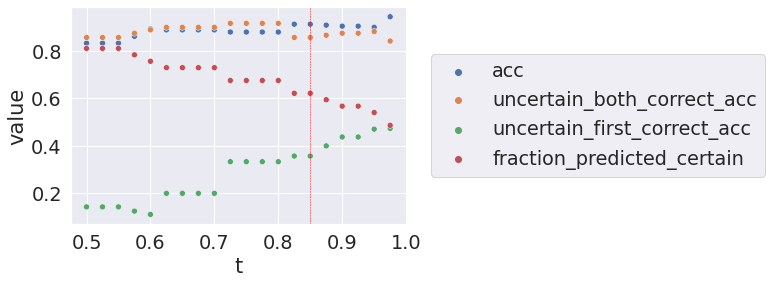

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarnin

/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

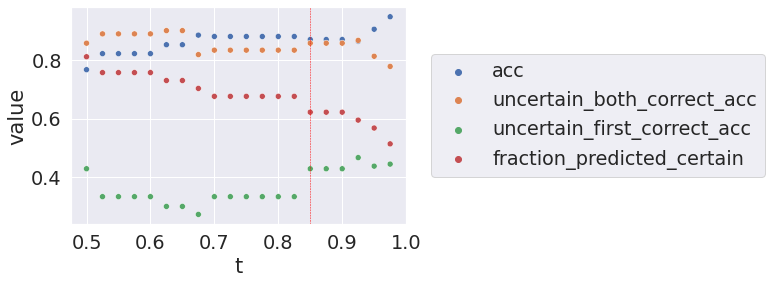

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarnin

/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

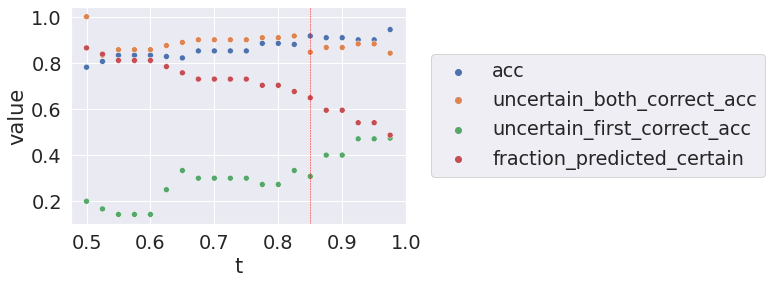

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarnin

/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

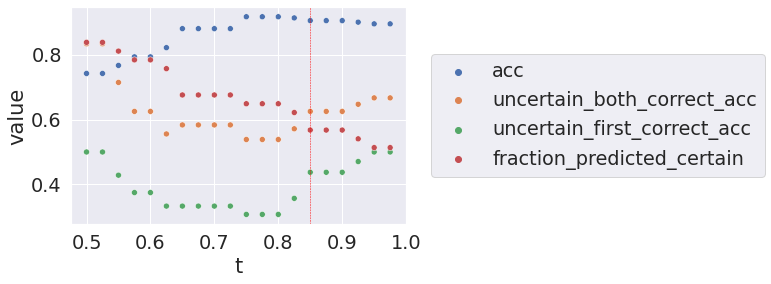

In [33]:
from sklearn.metrics import confusion_matrix

for model_num in range(4):
    
    accs = {}
    uncertain_both_correct_accs = {}
    uncertain_first_correct_accs = {}
    fraction_certains = {}

    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (stanford_diagnoses['overallpath'] == predictions).mean()
    
    # now cycle through different values of t
    for t in np.linspace(0.5, 0.975, 20):
        certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(predictions, probs, stanford_diagnoses['overallpath'],stanford_diagnoses['X'],  t, verbose=False)
        # add missing rows in uncertain_table
        to_add = set([0,1,2,3,4]).difference(uncertain_table.index)
        for i in to_add:
            uncertain_table.loc[i, :] = [0, 0, 0]
        uncertain_table = uncertain_table.loc[[0,1,2,3,4]].astype('int')

        # get metrics for this threshold value for this model - can't combine results from all models like before, as they are running on the same Stanford data (and not different test folds)
        sum_correct = sum([certain_conf_mat[i, j] for i in range(5) for j in range(5) if i == j])
        sum_incorrect = sum([certain_conf_mat[i, j] for i in range(5) for j in range(5) if i != j])
        accs[t] = sum_correct/(sum_incorrect + sum_correct)

        both_corrects = np.logical_not(uncertain_preds['both_incorrect'])
        uncertain_both_correct_accs[t] = both_corrects.mean()

        first_corrects = uncertain_preds['correct']
        uncertain_first_correct_accs[t] = first_corrects.mean()

        num_uncertains = uncertain_preds['uncertain'].sum()
        num_certains = sum(sum(certain_conf_mat))
        fract = num_certains/(num_certains + num_uncertains)
        fraction_certains[t] = fract

    # now plot metrics for different values of t
    to_plot = pd.DataFrame({'acc': accs.values(), 'uncertain_both_correct_acc': uncertain_both_correct_accs.values(), 'uncertain_first_correct_acc': uncertain_first_correct_accs.values(), 'fraction_predicted_certain':fraction_certains.values(), 't': accs.keys()})
    to_plot = pd.melt(to_plot, id_vars = ['t']) # put in long form
    # lets plot these
    acc = sns.scatterplot(data = to_plot, x = 't', y = 'value', hue = 'variable')
    l = plt.legend(loc='right', bbox_to_anchor = (2.1, 0.5)) # move legend out the way
    plt.axvline(x=0.85, color='red', linestyle='--', linewidth = 0.5)
    xts = plt.xticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
    plt.show()



### Results on Chopra data

In [54]:
chopra_data = pd.read_csv('data/Chopra_external/preprocessed_validation_m_vals.csv')
diagnoses = pd.read_csv('data/Chopra_external/preprocessed_validation_pdata.testing_diagnoses.csv')

data = chopra_data.iloc[:,3:]
data.shape
met_array = np.array(np.transpose(data))
met_array.shape

mapping = {'Normal': 0, 'KIRC': 1, 'KICH': 2, 'oncocytoma': 3, 'KIRP': 4, 'normal': 0, 'Other': 5}
diagnoses['overallpath'] = [mapping[l] for l in diagnoses['label']]

(158670, 245)

(245, 158670)

In [55]:
met_array

array([[-0.04878389,  4.0125843 , -3.52007172, ..., -5.30029568,
        -5.66988954, -3.51620826],
       [ 1.63162588,  3.9402817 , -3.80730523, ..., -5.48785725,
        -5.20132767, -3.33457751],
       [ 2.35507296,  4.31363597, -4.01788514, ..., -5.58659668,
        -5.53070537, -3.93467765],
       ...,
       [-0.79826941,  4.20216764, -2.69166607, ..., -5.2727653 ,
        -4.66334936, -3.17646626],
       [ 0.22155368,  3.51126055, -3.32261747, ..., -5.16671007,
        -5.54225336, -3.44284725],
       [ 0.57378361,  4.35095199, -3.42330049, ..., -5.17446819,
        -5.16364838, -4.18370197]])

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[98,  3,  0,  0,  0],
       [10, 88,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [15,  0,  8,  2,  1],
       [ 1,  2,  1,  0, 10]])

0.8326530612244898

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.34375
First or second pred, accuracy is  0.65625


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


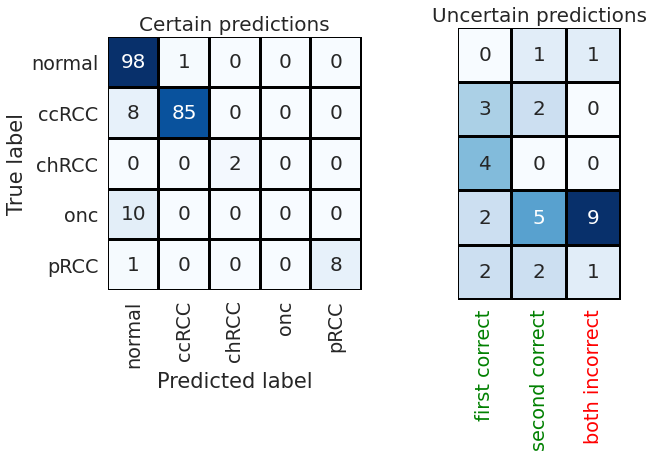

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[98,  3,  0,  0,  0],
       [10, 88,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [13,  2,  8,  2,  1],
       [ 1,  3,  0,  0, 10]])

0.8326530612244898

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.3225806451612903
First or second pred, accuracy is  0.7741935483870968


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


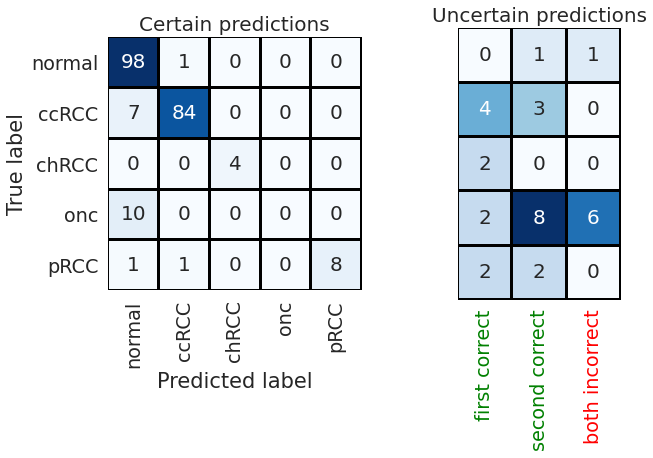

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[99,  2,  0,  0,  0],
       [11, 87,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [13,  0, 12,  1,  0],
       [ 1,  3,  2,  0,  8]])

0.8204081632653061

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.2
First or second pred, accuracy is  0.7


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


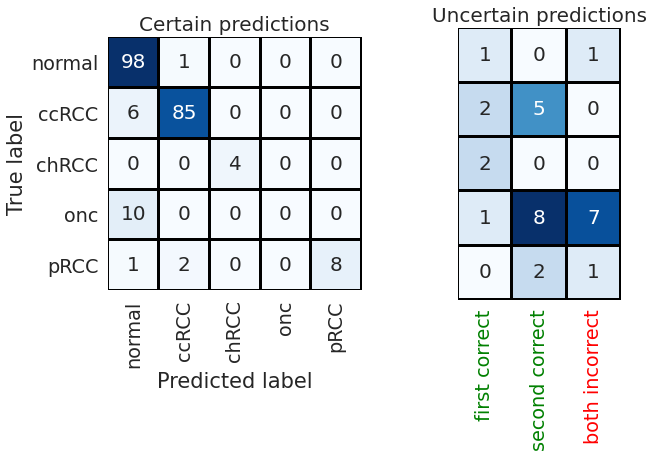

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[98,  3,  0,  0,  0],
       [11, 87,  0,  0,  0],
       [ 0,  1,  5,  0,  0],
       [12,  0, 10,  0,  4],
       [ 2,  3,  0,  0,  9]])

0.8122448979591836

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.3055555555555556
First or second pred, accuracy is  0.75


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


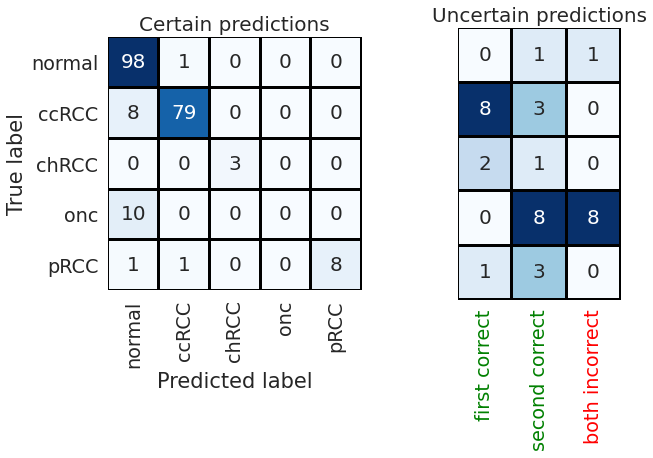

,Accuracy,MCC,F1
Certain,0.904786,0.842007,"[0.911, 0.947, 1.0, 0.0, 0.89]"
Uncertain first prediction,0.292972,0.22122,"[0.045, 0.5, 0.323, 0.141, 0.323]"
Uncertain second prediction,0.427139,0.278682,"[0.229, 0.389, 0.1, 0.614, 0.379]"
Uncertain first or second prediction,0.720111,0.667929,"[0.329, 0.918, 0.594, 0.691, 0.85]"


In [56]:
t = 0.85
from sklearn.metrics import confusion_matrix
certain_metricss = []
uncertain_metrics_firsts = []
uncertain_metrics_seconds = []
uncertain_metrics_first_or_seconds = []
uncertain_predss = []
certain_predss = []
for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (diagnoses['overallpath'] == predictions).mean()
    confusion_matrix(diagnoses['overallpath'], predictions)
    acc

    t
    certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(predictions, probs, diagnoses['overallpath'], diagnoses['id'], t)

    certain_metricss.append(certain_metrics)
    uncertain_metrics_firsts.append(uncertain_metrics_first)
    uncertain_metrics_seconds.append(uncertain_metrics_second)
    uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)
    
    uncertain_predss.append(uncertain_preds)
    certain_predss.append(certain_preds)
    
    # add missing rows in uncertain_table
    to_add = set([0,1,2,3,4]).difference(uncertain_table.index)
    for i in to_add:
        uncertain_table.loc[i, :] = [0, 0, 0]
    uncertain_table = uncertain_table.loc[[0,1,2,3,4]].astype('int')
    uncertain_table.index.name = ''

    plot_perf_with_uncertainty(certain_conf_mat, uncertain_table, [uncertain_preds], name = 'Chopra_uncertain_conf_mats_' + str(model_num) + '.svg')

score_df_chopra = pd.DataFrame(
    {'Certain': [np.mean([m['Accuracy'] for m in certain_metricss]), np.mean([m['MCC'] for m in certain_metricss]), np.round(np.mean([m['F1'] for m in certain_metricss], axis = 0), 3)],
     'Uncertain first prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_firsts]), np.mean([m['MCC'] for m in uncertain_metrics_firsts]), np.round(np.mean([m['F1'] for m in uncertain_metrics_firsts], axis = 0), 3)],
     'Uncertain second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_seconds], axis = 0), 3)],
     'Uncertain first or second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_first_or_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_first_or_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_first_or_seconds], axis = 0), 3)]
}, index=['Accuracy', 'MCC', 'F1'])
score_df_chopra.transpose()    
    
    

In [38]:
# now to save the prediction tables
preds_tables = [certain_predss[i].append(uncertain_predss[i]) for i in range(4)]
for i in range(len(preds_tables)):
    preds_tables[i].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/Chopra_preds_' + str(i) + '.csv', index = False)
    

### Results on GSE61441 data

In [57]:
gse_data = pd.read_csv('data/Wei_external/preprocessed_validation_m_vals.csv')
GSE_diagnoses = pd.read_csv('data/Wei_external/preprocessed_validation_diagnoses.csv')
mapping = {'Normal': 0, 'KIRC': 1}
GSE_diagnoses['overallpath'] = [mapping[l] for l in GSE_diagnoses['label']]

/home/in268/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
met_array = np.transpose(np.array(gse_data.iloc[:,3:]))
met_array.shape

(92, 158670)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[45,  0,  1,  0],
       [ 3, 34,  5,  4],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

0.8586956521739131

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.5294117647058824
First or second pred, accuracy is  0.7647058823529411


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

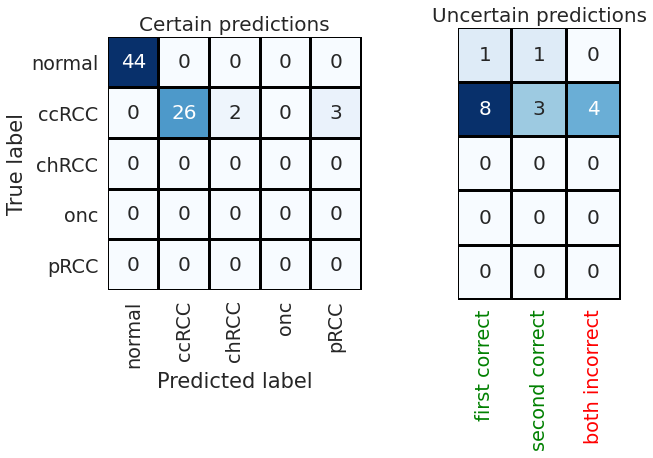

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[45,  1,  0,  0],
       [ 3, 36,  2,  5],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

0.8804347826086957

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.625
First or second pred, accuracy is  0.9375


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

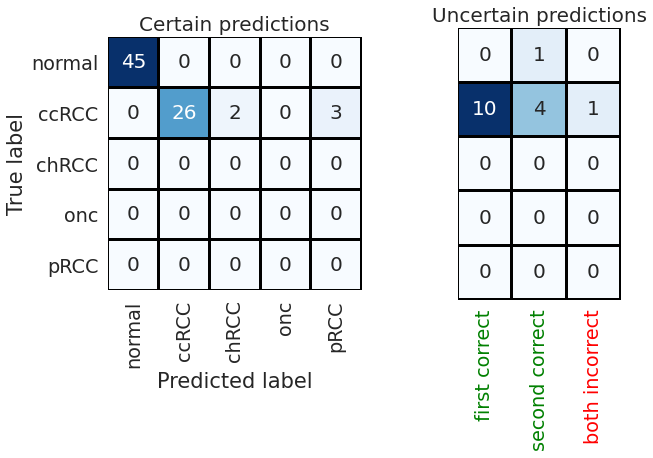

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[45,  0,  1,  0],
       [ 3, 35,  3,  5],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

0.8695652173913043

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.7


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

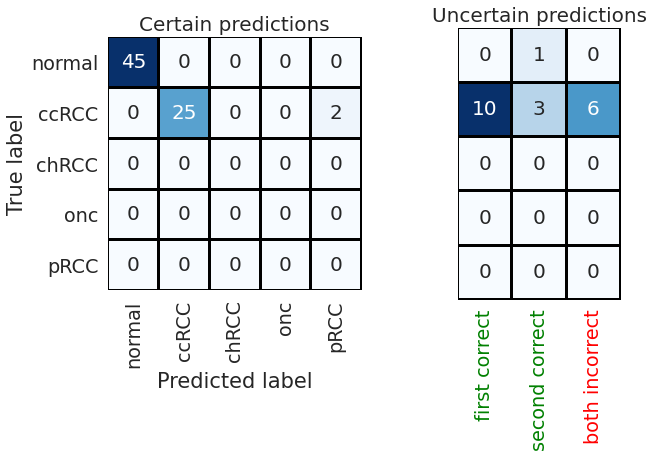

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[45,  0,  1,  0],
       [ 2, 37,  3,  4],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

0.8913043478260869

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.6428571428571429
First or second pred, accuracy is  0.7857142857142857


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

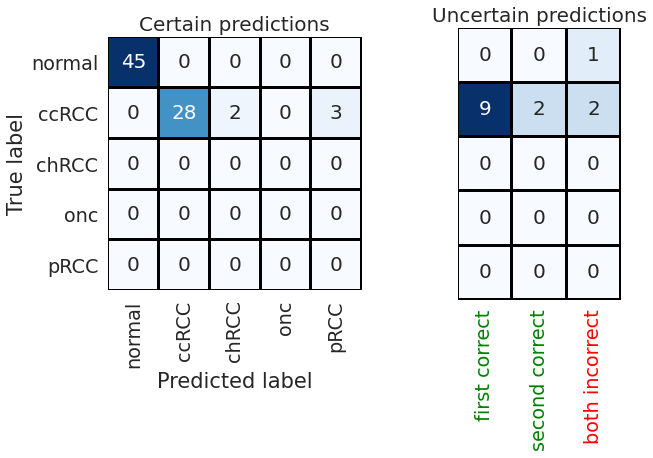

,Accuracy,MCC,F1
Certain,0.943916,0.894976,"[1.0, 0.926, 0.0, 0.0, 0.0]"
Uncertain first prediction,0.574317,0.0759131,"[0.083, 0.743, 0.0, 0.0, 0.0]"
Uncertain second prediction,0.222663,0.0171551,"[0.212, 0.315, 0.0, 0.0, 0.0]"
Uncertain first or second prediction,0.79698,0.439435,"[0.458, 0.885, 0.0, 0.0, 0.0]"


In [59]:
from sklearn.metrics import confusion_matrix
certain_metricss = []
uncertain_metrics_firsts = []
uncertain_metrics_seconds = []
uncertain_metrics_first_or_seconds = []
uncertain_predss = []
certain_predss = []

for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (GSE_diagnoses['overallpath'] == predictions).mean()
    confusion_matrix(GSE_diagnoses['overallpath'], predictions)
    acc

    t
    certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(predictions, probs, GSE_diagnoses['overallpath'], GSE_diagnoses['sample_id'], t)
    
    certain_metricss.append(certain_metrics)
    uncertain_metrics_firsts.append(uncertain_metrics_first)
    uncertain_metrics_seconds.append(uncertain_metrics_second)
    uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)
    
    uncertain_predss.append(uncertain_preds)
    certain_predss.append(certain_preds)
    
    # add missing rows in uncertain_table
    to_add = set([0,1,2,3,4]).difference(uncertain_table.index)
    for i in to_add:
        uncertain_table.loc[i, :] = [0, 0, 0]
    uncertain_table = uncertain_table.loc[[0,1,2,3,4]].astype('int')
    uncertain_table.index.name = ''
    
    plot_perf_with_uncertainty(certain_conf_mat, uncertain_table, [uncertain_preds], name = 'GSE61441_uncertain_conf_mats_' + str(model_num) + '.svg')
    
    
score_df_gse = pd.DataFrame(
    {'Certain': [np.mean([m['Accuracy'] for m in certain_metricss]), np.mean([m['MCC'] for m in certain_metricss]), np.round(np.mean([m['F1'] for m in certain_metricss], axis = 0), 3)],
     'Uncertain first prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_firsts]), np.mean([m['MCC'] for m in uncertain_metrics_firsts]), np.round(np.mean([m['F1'] for m in uncertain_metrics_firsts], axis = 0), 3)],
     'Uncertain second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_seconds], axis = 0), 3)],
     'Uncertain first or second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_first_or_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_first_or_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_first_or_seconds], axis = 0), 3)]
}, index=['Accuracy', 'MCC', 'F1'])
score_df_gse.transpose()    


In [42]:
# now to save the prediction tables
preds_tables = [certain_predss[i].append(uncertain_predss[i]) for i in range(4)]
for i in range(len(preds_tables)):
    preds_tables[i].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/GSE61441_preds_' + str(i) + '.csv', index = False)


In [60]:
score_df_gse


,Certain,Uncertain first prediction,Uncertain second prediction,Uncertain first or second prediction
Accuracy,0.943916,0.574317,0.222663,0.79698
MCC,0.894976,0.0759131,0.0171551,0.439435
F1,"[1.0, 0.926, 0.0, 0.0, 0.0]","[0.083, 0.743, 0.0, 0.0, 0.0]","[0.212, 0.315, 0.0, 0.0, 0.0]","[0.458, 0.885, 0.0, 0.0, 0.0]"


### Results on Evelonn data

In [144]:
import pandas as pd

evelonn_data = pd.read_csv('data/Evelonn_external/preprocessed_validation_m_vals_from_normalised_data.csv', index_col=0)
evelonn_diagnoses = pd.read_csv('data/Evelonn_external/preprocessed_validation_beta_diagnoses_from_normalised_data.csv')
mapping = {'Normal': 0, 'ccRCC': 1}
evelonn_diagnoses['overallpath'] = [mapping[l] for l in evelonn_diagnoses['diagnosis']]
evelonn_diagnoses

evelonn_data

met_array = np.transpose(np.array(evelonn_data))
met_array.shape

,Unnamed: 0,accession,stage,name,diagnosis,overallpath
0,1,GSM3107981,TNM II,"genomic DNA from tumor, ccRCC sample 1",ccRCC,1
1,2,GSM3107982,TNM IV,"genomic DNA from tumor, ccRCC sample 2",ccRCC,1
2,3,GSM3107983,TNM IV,"genomic DNA from tumor, ccRCC sample 3",ccRCC,1
3,4,GSM3107984,TNM I,"genomic DNA from tumor, ccRCC sample 4",ccRCC,1
4,5,GSM3107985,TNM IV,"genomic DNA from tumor, ccRCC sample 5",ccRCC,1
...,...,...,...,...,...,...
139,140,GSM3108120,TNM I,"genomic DNA from tumor, ccRCC sample Pat5_1",ccRCC,1
140,141,GSM3108121,TNM I,"genomic DNA from tumor, ccRCC sample Pat5_2",ccRCC,1
141,142,GSM3108122,TNM I,"genomic DNA from tumor, ccRCC sample Pat5_3",ccRCC,1
142,143,GSM3108123,TNM II,"genomic DNA from tumor, ccRCC sample Pat6_1",ccRCC,1


,GSM3107981,GSM3107982,GSM3107983,GSM3107984,GSM3107985,GSM3107986,GSM3107987,GSM3107988,GSM3107989,GSM3107990,...,GSM3108115,GSM3108116,GSM3108117,GSM3108118,GSM3108119,GSM3108120,GSM3108121,GSM3108122,GSM3108123,GSM3108124
0,0.445777,1.053196,-0.199953,1.923963,0.530827,-0.201547,-0.382081,0.378167,1.323179,1.024741,...,-0.160283,-0.341783,0.907670,0.591315,1.057932,1.387880,1.080279,1.479163,-2.705215,-2.897300
1,4.386087,4.447565,4.724234,4.577407,4.318411,4.369156,4.382151,4.177818,4.154117,4.074982,...,3.205919,2.408423,4.017603,3.938517,3.889494,2.848900,2.820438,2.937798,3.646207,3.717229
2,-3.954403,-3.740219,-3.521352,-3.610765,-3.529647,-3.791212,-3.612350,-3.332187,-3.752620,-3.589886,...,-3.708830,-3.289813,-3.614206,-3.584404,-3.696092,-3.650968,-3.382874,-3.229965,-3.537899,-3.852987
3,-3.196520,-3.396175,-3.436162,-3.128000,-3.035599,-3.983656,-3.652384,-3.252941,-3.434021,-3.249665,...,-3.676860,-3.690315,-3.274611,-3.352450,-3.295036,-2.791133,-2.854212,-3.281811,-3.124426,-3.174152
4,-3.669352,-3.475467,-3.279168,-3.452826,-3.414458,-3.620185,-3.143694,-3.474731,-3.157362,-3.682130,...,-1.290460,-1.389074,-3.108670,-3.156707,-2.965686,-2.980795,-3.017581,-2.928625,-2.342305,-2.847438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158665,-4.275970,-4.470333,-4.535974,-4.932074,-4.704971,-4.350595,-4.518431,-4.819475,-4.462646,-4.518697,...,-3.312857,-2.430822,-4.298223,-4.146055,-3.605700,-4.301203,-4.156031,-3.746491,-3.170851,-3.446440
158666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.416221,-2.378391,-3.880011,-3.463162,-4.023374,-3.727099,-3.740499,-3.764274,-4.532031,-4.310246
158667,-6.040702,-5.717214,-6.166017,-5.945106,-5.599586,-5.182002,-5.123492,-5.135804,-5.231873,-5.179218,...,-3.553961,-2.890701,-5.192529,-5.050024,-5.122932,-4.526424,-5.455266,-5.086479,-5.251076,-4.920774
158668,-5.345087,-5.709850,-6.441553,-5.783125,-5.566604,-4.398356,-5.339741,-5.414435,-5.312796,-6.256795,...,-3.319758,-2.592112,-5.194665,-4.827036,-5.071763,-5.198925,-5.580490,-4.951520,-4.864956,-4.880152


(144, 158670)

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[ 12,   0,   0,   0],
       [  0, 109,  19,   4],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

0.8402777777777778

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.5
First or second pred, accuracy is  0.7666666666666667


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

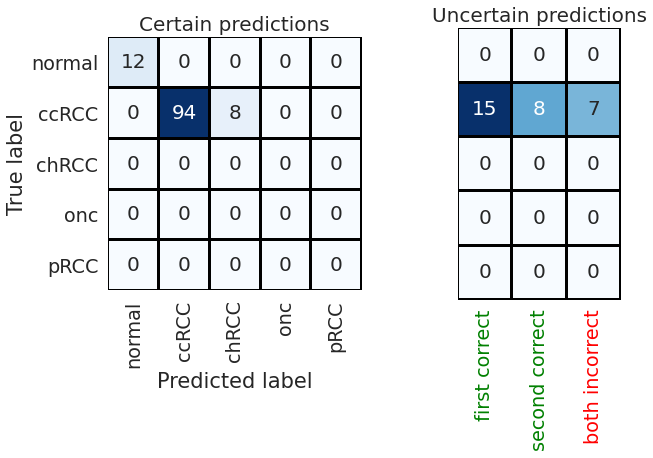

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[ 12,   0,   0,   0],
       [  0, 120,  10,   2],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

0.9166666666666666

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.7727272727272727
First or second pred, accuracy is  1.0


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

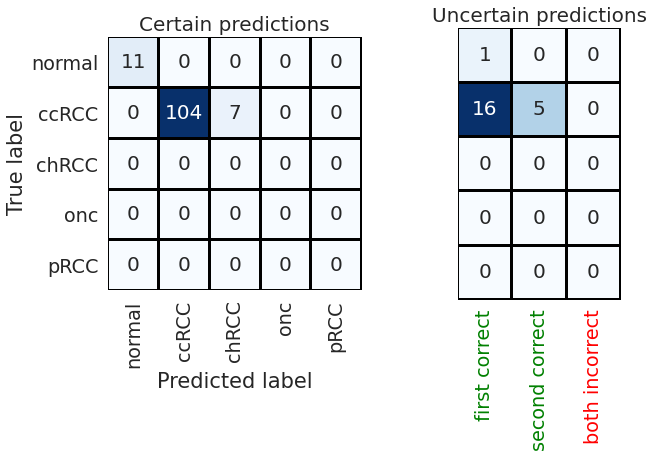

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[ 12,   0,   0,   0],
       [  0, 118,  11,   3],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

0.9027777777777778

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.6538461538461539
First or second pred, accuracy is  0.7692307692307693


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

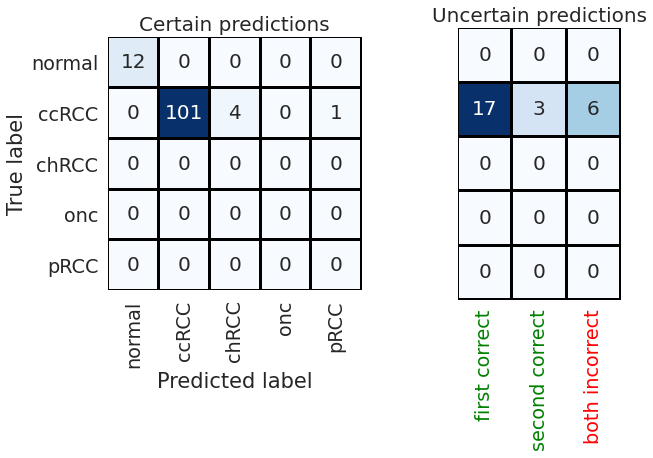

/home/in268/.local/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[ 12,   0,   0,   0],
       [  0, 120,   9,   3],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]])

0.9166666666666666

0.85

Should be 0: 0.0
Using first pred, accuracy is  0.631578947368421
First or second pred, accuracy is  0.8947368421052632


/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/in268/.local/lib/python3.7/site-packages/sklearn/metrics/_classificatio

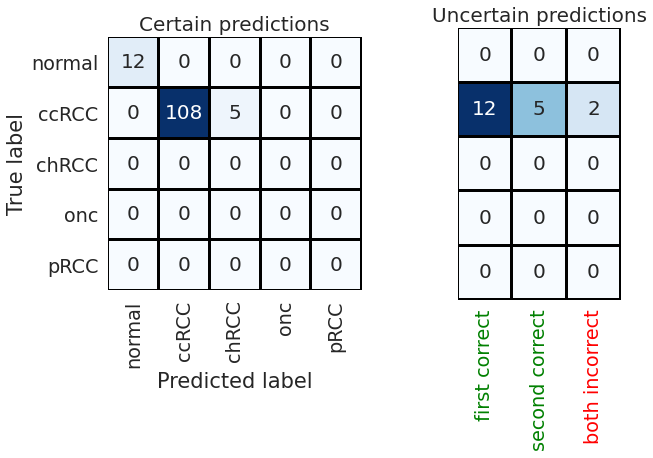

,Accuracy,MCC,F1
Certain,0.947519,0.793719,"[1.0, 0.97, 0.0, 0.0, 0.0]"
Uncertain first prediction,0.639538,0.0975686,"[0.25, 0.774, 0.0, 0.0, 0.0]"
Uncertain second prediction,0.21812,-0.0396177,"[0.0, 0.354, 0.0, 0.0, 0.0]"
Uncertain first or second prediction,0.857659,0.25,"[0.25, 0.92, 0.0, 0.0, 0.0]"


In [145]:
from sklearn.metrics import confusion_matrix
certain_metricss = []
uncertain_metrics_firsts = []
uncertain_metrics_seconds = []
uncertain_metrics_first_or_seconds = []
uncertain_predss = []
certain_predss = []

for model_num in range(4):
    model = get_model(model_num)
    predictions = model.predict(met_array)
    probs = model.predict_proba(met_array)
    acc = (evelonn_diagnoses['overallpath'] == predictions).mean()
    confusion_matrix(evelonn_diagnoses['overallpath'], predictions)
    acc

    t
    certain_conf_mat, certain_metrics, certain_preds, uncertain_table, uncertain_preds, uncertain_metrics_first, uncertain_metrics_second, uncertain_metrics_first_or_second = get_perf_with_uncertainty(predictions, probs, evelonn_diagnoses['overallpath'], evelonn_diagnoses['accession'], t)
    
    certain_metricss.append(certain_metrics)
    uncertain_metrics_firsts.append(uncertain_metrics_first)
    uncertain_metrics_seconds.append(uncertain_metrics_second)
    uncertain_metrics_first_or_seconds.append(uncertain_metrics_first_or_second)
    
    uncertain_predss.append(uncertain_preds)
    certain_predss.append(certain_preds)
    
    # add missing rows in uncertain_table
    to_add = set([0,1,2,3,4]).difference(uncertain_table.index)
    for i in to_add:
        uncertain_table.loc[i, :] = [0, 0, 0]
    uncertain_table = uncertain_table.loc[[0,1,2,3,4]].astype('int')
    uncertain_table.index.name = ''
    
    plot_perf_with_uncertainty(certain_conf_mat, uncertain_table, [uncertain_preds], name = 'Evelonn_uncertain_conf_mats_' + str(model_num) + '.svg')
    
    
score_df_evelonn = pd.DataFrame(
    {'Certain': [np.mean([m['Accuracy'] for m in certain_metricss]), np.mean([m['MCC'] for m in certain_metricss]), np.round(np.mean([m['F1'] for m in certain_metricss], axis = 0), 3)],
     'Uncertain first prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_firsts]), np.mean([m['MCC'] for m in uncertain_metrics_firsts]), np.round(np.mean([m['F1'] for m in uncertain_metrics_firsts], axis = 0), 3)],
     'Uncertain second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_seconds], axis = 0), 3)],
     'Uncertain first or second prediction': [np.mean([m['Accuracy'] for m in uncertain_metrics_first_or_seconds]), np.mean([m['MCC'] for m in uncertain_metrics_first_or_seconds]), np.round(np.mean([m['F1'] for m in uncertain_metrics_first_or_seconds], axis = 0), 3)]
}, index=['Accuracy', 'MCC', 'F1'])
score_df_evelonn.transpose()    


In [146]:
# now to save the prediction tables
preds_tables = [certain_predss[i].append(uncertain_predss[i]) for i in range(4)]
for i in range(len(preds_tables)):
    preds_tables[i].to_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/Evelonn_preds_' + str(i) + '.csv', index = False)
    


### Bar plot of uncertain prediction metrics


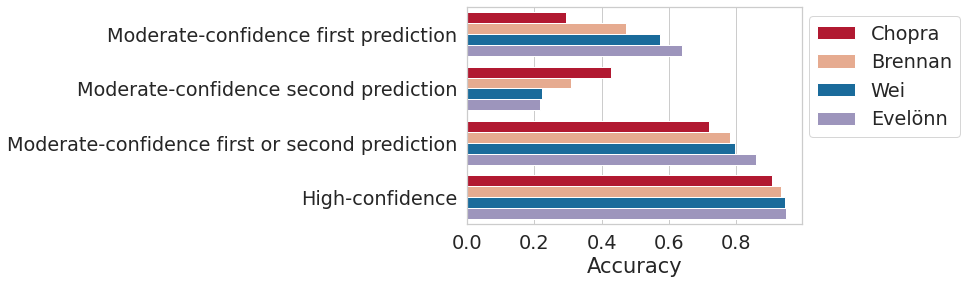

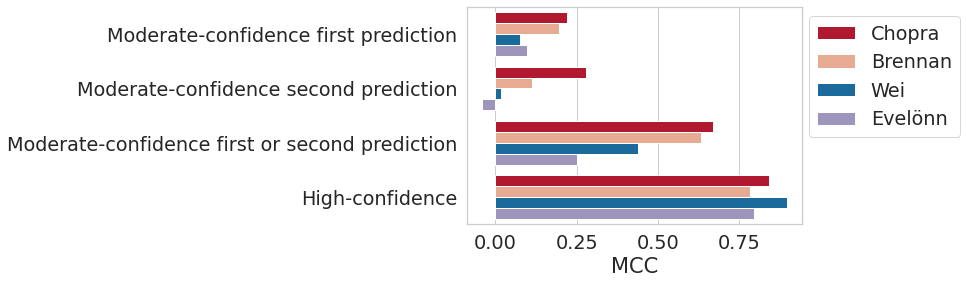

In [206]:
df_gse = score_df_gse.transpose()
df_gse['type'] = df_gse.index
df_gse['dataset'] = 'Wei'
df_gse = pd.melt(df_gse, id_vars = ['type', 'dataset'])

df_Chopra = score_df_chopra.transpose()
df_Chopra['type'] = df_Chopra.index
df_Chopra['dataset'] = 'Chopra'
df_Chopra = pd.melt(df_Chopra, id_vars = ['type', 'dataset'])

df_Stanford = score_df_stanford.transpose()
df_Stanford['type'] = df_Stanford.index
df_Stanford['dataset'] = 'Brennan'
df_Stanford = pd.melt(df_Stanford, id_vars = ['type', 'dataset'])

df_Evelonn = score_df_evelonn.transpose()
df_Evelonn['type'] = df_Evelonn.index
df_Evelonn['dataset'] = 'Evelönn'
df_Evelonn = pd.melt(df_Evelonn, id_vars = ['type', 'dataset'])

to_plot = df_gse.append(df_Chopra).append(df_Stanford).append(df_Evelonn)
to_plot['type'] = to_plot['type'].str.replace('Certain', 'High-confidence')
to_plot['type'] = to_plot['type'].str.replace('Uncertain first prediction', 'Moderate-confidence first prediction')
to_plot['type'] = to_plot['type'].str.replace('Uncertain second prediction', 'Moderate-confidence second prediction')
to_plot['type'] = to_plot['type'].str.replace('Uncertain first or second prediction', 'Moderate-confidence first or second prediction')


# Accuracy:
import seaborn as sb
to_plot = to_plot.query('variable== "Accuracy"') 
bp = sb.barplot(data = to_plot, x = 'value', y = 'type', hue = 'dataset', orient='h', order = ['Moderate-confidence first prediction', 'Moderate-confidence second prediction', 'Moderate-confidence first or second prediction', 'High-confidence'], hue_order=['Chopra', 'Brennan', 'Wei', 'Evelönn'], palette = ['#ca0020', '#f4a582', '#0571b0', '#998ec3'])
sb.set_style('whitegrid')
xl = plt.xlabel('Accuracy')
yl = plt.ylabel('')
l = plt.legend(bbox_to_anchor=(1.5, 1))
plt.savefig('figs_xgboost_high_mod_conf/metrics_plot_accuracy.svg', bbox_inches='tight')
plt.show()

# MCC:
to_plot = df_gse.append(df_Chopra).append(df_Stanford).append(df_Evelonn)
to_plot['type'] = to_plot['type'].str.replace('Certain', 'High-confidence')
to_plot['type'] = to_plot['type'].str.replace('Uncertain first prediction', 'Moderate-confidence first prediction')
to_plot['type'] = to_plot['type'].str.replace('Uncertain second prediction', 'Moderate-confidence second prediction')
to_plot['type'] = to_plot['type'].str.replace('Uncertain first or second prediction', 'Moderate-confidence first or second prediction')
to_plot = to_plot.query('variable== "MCC"') 
bp = sb.barplot(data = to_plot, x = 'value', y = 'type', hue = 'dataset', orient='h', order = ['Moderate-confidence first prediction', 'Moderate-confidence second prediction', 'Moderate-confidence first or second prediction', 'High-confidence'], hue_order=['Chopra', 'Brennan', 'Wei', 'Evelönn'], palette = ['#ca0020', '#f4a582', '#0571b0', '#998ec3'])
sb.set_style('whitegrid')
xl = plt.xlabel('MCC')
yl = plt.ylabel('')
l = plt.legend(bbox_to_anchor=(1.5, 1))
plt.savefig('figs_xgboost_high_mod_conf/metrics_plot_MCC.svg', bbox_inches='tight')



In [191]:
# save as latex table:

df_gse = score_df_gse.transpose()
df_gse['type'] = df_gse.index
df_gse['dataset'] = 'Wei'
df_gse = pd.melt(df_gse, id_vars = ['type', 'dataset'])

df_Chopra = score_df_chopra.transpose()
df_Chopra['type'] = df_Chopra.index
df_Chopra['dataset'] = 'Chopra'
df_Chopra = pd.melt(df_Chopra, id_vars = ['type', 'dataset'])

df_Stanford = score_df_stanford.transpose()
df_Stanford['type'] = df_Stanford.index
df_Stanford['dataset'] = 'Brennan'
df_Stanford = pd.melt(df_Stanford, id_vars = ['type', 'dataset'])

df_Evelonn = score_df_evelonn.transpose()
df_Evelonn['type'] = df_Evelonn.index
df_Evelonn['dataset'] = 'Evelönn'
df_Evelonn = pd.melt(df_Evelonn, id_vars = ['type', 'dataset'])

to_plot = df_gse.append(df_Chopra).append(df_Stanford).append(df_Evelonn)



to_save_as_table = to_plot[to_plot['variable'] != 'F1']
to_save_as_table = to_save_as_table[to_save_as_table['type'].isin(['Certain', 'Uncertain first or second prediction'])]
to_save_as_table['type'] = to_save_as_table['type'].str.replace('Certain', 'High-confidence')
to_save_as_table['type'] = to_save_as_table['type'].str.replace('Uncertain first or second prediction', 'Moderate-confidence, first or second prediction')


to_save_as_table = to_save_as_table.pivot(index=['type', 'dataset'], columns=['variable'], values='value').transpose()

# making the columns in the right order
to_save_as_table = pd.concat([to_save_as_table['High-confidence'][['Chopra', 'Brennan', 'Wei', 'Evelönn']], 
            to_save_as_table['Moderate-confidence, first or second prediction'][['Chopra', 'Brennan', 'Wei', 'Evelönn']]
          ], axis=1)

to_save_as_table.index.name = ''
to_save_as_table.columns.name = ''
to_save_as_table

to_save_as_table.astype(float).round(3).to_latex(buf='figs_xgboost_high_mod_conf/latex_external_validation_scores.txt')


# And then add this line into the 3rd line of the saved latex:
'{} & \multicolumn{5}{l}{High-confidence} & \multicolumn{5}{l}{Moderate-confidence, first or second prediction} \\'



to_save_as_table.astype(float).round(3)



,Chopra,Brennan,Wei,Evelönn,Chopra,Brennan,Wei,Evelönn
,,,,,,,,
Accuracy,0.904786,0.932749,0.943916,0.947519,0.720111,0.782164,0.79698,0.857659
MCC,0.842007,0.782537,0.894976,0.793719,0.667929,0.631947,0.439435,0.25


'{} & \\multicolumn{5}{l}{High-confidence} & \\multicolumn{5}{l}{Moderate-confidence, first or second prediction} \\'

,Chopra,Brennan,Wei,Evelönn,Chopra,Brennan,Wei,Evelönn
,,,,,,,,
Accuracy,0.905,0.933,0.944,0.948,0.720,0.782,0.797,0.858
MCC,0.842,0.783,0.895,0.794,0.668,0.632,0.439,0.250


### Making heatmaps showing number of high vs moderate predictions for external validation datasets

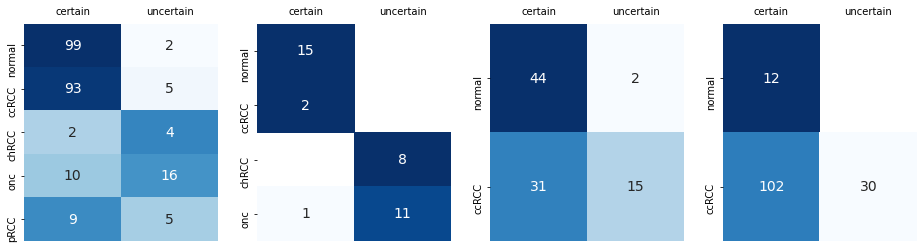

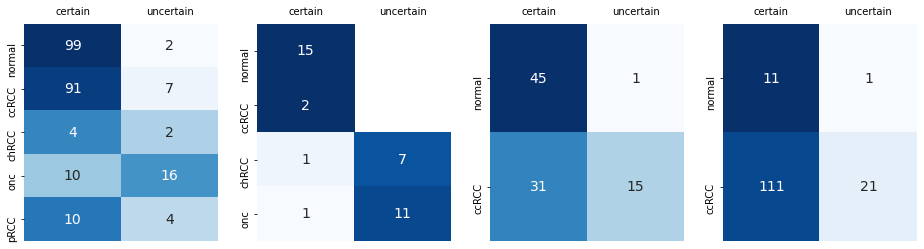

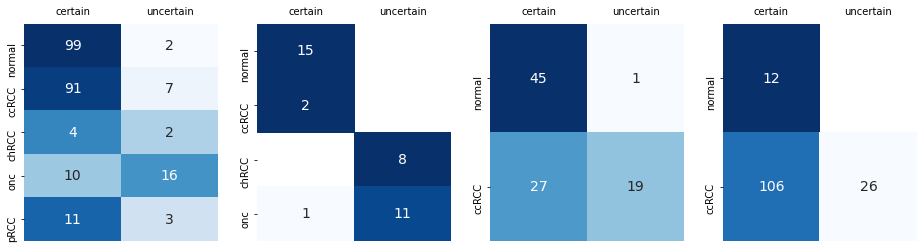

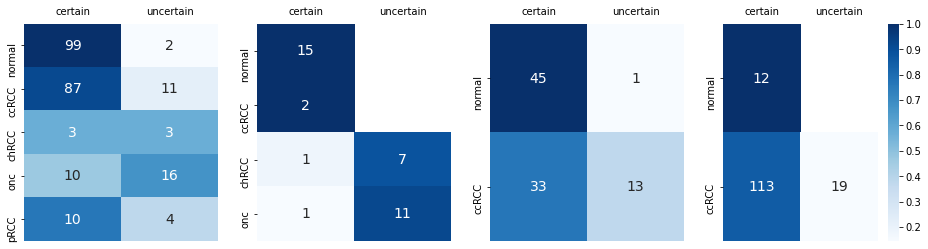

In [104]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

datasets = ['Chopra', 'Stanford', 'GSE61441', 'Evelonn']

for model_num in range(4):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    for dataset, i in zip(datasets, range(4)):
        uncertain_data = pd.read_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/' + dataset + '_preds_' + str(model_num) + '.csv')

        to_plot = uncertain_data.groupby(['y_true', 'uncertain'])['sample'].count()

        to_plot = pd.DataFrame(to_plot).reset_index().pivot(index='y_true', columns='uncertain', values='sample') # reshape into 2d matrix
        to_plot.columns = ['certain', 'uncertain']
        class_mapping = {0:'normal', 1:'ccRCC', 2:'chRCC', 3:'onc', 4:'pRCC'}
        to_plot.index = [class_mapping[ind] for ind in to_plot.index]

        to_plot_norm = (to_plot.transpose()/to_plot.transpose().sum()).transpose()

        axs[i].tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
        if (model_num == 3) and (i == 3): # only plot cbar for last model (it looks the same for all plots)
            cbar=True
        else:
            cbar=False
        hm = sb.heatmap(to_plot_norm, annot = to_plot.fillna(0).astype(int), cmap='Blues', cbar=cbar, annot_kws={"size": 14}, fmt="d", ax=axs[i]) 
        
        
    
    plt.savefig('figs_xgboost_high_mod_conf/uncertain_pred_counts_heatmap_model_' + str(model_num) + '.svg')
    
    


[        certain  uncertain
 normal       99          2
 ccRCC        93          5
 chRCC         2          4
 onc          10         16
 pRCC          9          5,         certain  uncertain
 normal       99          2
 ccRCC        91          7
 chRCC         4          2
 onc          10         16
 pRCC         10          4,         certain  uncertain
 normal       99          2
 ccRCC        91          7
 chRCC         4          2
 onc          10         16
 pRCC         11          3,         certain  uncertain
 normal       99          2
 ccRCC        87         11
 chRCC         3          3
 onc          10         16
 pRCC         10          4]

[        certain  uncertain
 normal     15.0        NaN
 ccRCC       2.0        NaN
 chRCC       NaN        8.0
 onc         1.0       11.0,         certain  uncertain
 normal     15.0        NaN
 ccRCC       2.0        NaN
 chRCC       1.0        7.0
 onc         1.0       11.0,         certain  uncertain
 normal     15.0        NaN
 ccRCC       2.0        NaN
 chRCC       NaN        8.0
 onc         1.0       11.0,         certain  uncertain
 normal     15.0        NaN
 ccRCC       2.0        NaN
 chRCC       1.0        7.0
 onc         1.0       11.0]

[        certain  uncertain
 normal       44          2
 ccRCC        31         15,         certain  uncertain
 normal       45          1
 ccRCC        31         15,         certain  uncertain
 normal       45          1
 ccRCC        27         19,         certain  uncertain
 normal       45          1
 ccRCC        33         13]

[        certain  uncertain
 normal     12.0        NaN
 ccRCC     102.0       30.0,         certain  uncertain
 normal       11          1
 ccRCC       111         21,         certain  uncertain
 normal     12.0        NaN
 ccRCC     106.0       26.0,         certain  uncertain
 normal     12.0        NaN
 ccRCC     113.0       19.0]

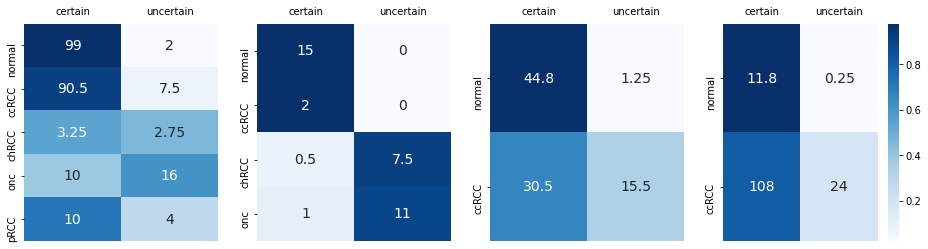

In [129]:
# now plot one version averaged across all models

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for dataset, i in zip(datasets, range(4)):
    to_plots = []
    for model_num in range(4):
        uncertain_data = pd.read_csv('figs_xgboost_high_mod_conf/high_mod_conf_predictions_csvs/' + dataset + '_preds_' + str(model_num) + '.csv')
        to_plot = uncertain_data.groupby(['y_true', 'uncertain'])['sample'].count()
        to_plot = pd.DataFrame(to_plot).reset_index().pivot(index='y_true', columns='uncertain', values='sample') # reshape into 2d matrix
        to_plot.columns = ['certain', 'uncertain']
        class_mapping = {0:'normal', 1:'ccRCC', 2:'chRCC', 3:'onc', 4:'pRCC'}
        to_plot.index = [class_mapping[ind] for ind in to_plot.index]
        to_plots.append(to_plot)
    to_plots
    # average counts from all models:
    to_plot = np.mean([p.fillna(0).values for p in to_plots], axis=0)
    to_plot = pd.DataFrame(to_plot, index = to_plots[0].index, columns=to_plots[0].columns)
    
    to_plot_norm = (to_plot.transpose()/to_plot.transpose().sum()).transpose()

    axs[i].tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    if (i == 3): # only plot cbar for last model (it looks the same for all plots)
        cbar=True
    else:
        cbar=False
    hm = sb.heatmap(to_plot_norm, annot = to_plot.astype(float), cmap='Blues', cbar=cbar, annot_kws={"size": 14}, fmt=".3g", ax=axs[i]) 
        
plt.savefig('figs_xgboost_high_mod_conf/uncertain_pred_counts_heatmap_models_averaged.svg')
        

Figure legend:
Number of samples that were predicted as high-confidence vs moderate-confidence, for each class and each external dataset. The colour represents the fraction of samples that are high/moderate confidence, separately for each class.
